<a href="https://colab.research.google.com/github/Azad-Me/NYC-Taxi-Trip-Duration-Prediction/blob/main/NYC_Taxi_Trip_Duration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  NYC Taxi Trip Duration Prediction.



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

**Let's say you are have reached to an airport after completing a business trip and you want to reach home as soon as possible. Now you have opened you phone and start looking for Cabs which could take you to the home. While searching for cabs you have noticed, the application is providing you a very vital information, which is the duration, you require to reach home. You felt that how an application can calculate the duration of an journey even before its completion ,whether this duration is just an assumption or have been calculated after evaluating a rigorous algorithm.**\
**So, the answer to this question lies inside this beautiful project.The project revolves around the prediction of regression values after evaluating some independent variables. In addition with it, project performs a EDA on the NYC dataset to find out hidden secrets for the business.**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**NYC taxi Dataset consisted with some important independent features which explains everything about journey of a taxi. The study revolves around the passenger , its booking time, trip duration, pick up location and drop location.We need to take help from the new advanced technologies of Machine Learnig and provide the best user experience to customers by providing the most accurate trip duration they would require to reach there destination.**

**Some additional question for EDA.**
> **What are the number of rides taken by each vendor?**

> **What is the count for network failure and loose connection?**

> **Which vendor have failed in connecting with servers maximum times?**

> **What is the variation in distance travelled by the passengers.**

> **What is the maximum distance travelled by taxies per day in all the six months.?**

> **What are the number of taxi trips per day?**

> **What is the on an average distance travelled by the taxies per day.**

> **Find out on which hour of day taxies are bussiest.**

> **Find out which day of the week is busiest**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
pip install --upgrade "kaleido==0.1.*"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 MB 10.6 MB/s eta 0:00:00


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore') 

from scipy.stats import *
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from math import radians,cos,sin,asin,sqrt

In [ ]:
!pip install plotly.express
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.1/864.1 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 25.5 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Load Dataset
first_df=pd.read_csv('/content/drive/MyDrive/dat/Dataset/NYC Taxi Data.csv')

### Dataset First View

In [ ]:
# Dataset First Look
first_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(len(first_df['id']))
print(len(first_df.columns))

1458644
11


There are 1458644 Rows and 11 Columns.

### Dataset Information

In [ ]:
# Dataset Info
first_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
first_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
first_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

**As we can see there are no null values and no duplicate columns.**

In [ ]:
# Visualizing the missing values

> **The Dataset consist more than 1.4 million rows and 11 features.**

> **It do not contain null values and duplicate columns either.**

> **The dataset provides the longitude and lattitude for every taxi trips and helps to measure the distance.**

> **Its target variable is the duration of taxies, which has to be predicted after the training of the model.**

> **Certain columns show integer type of data and certain columns shows object type of data.**



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
first_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
# Dataset Describe
first_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Variables Description 

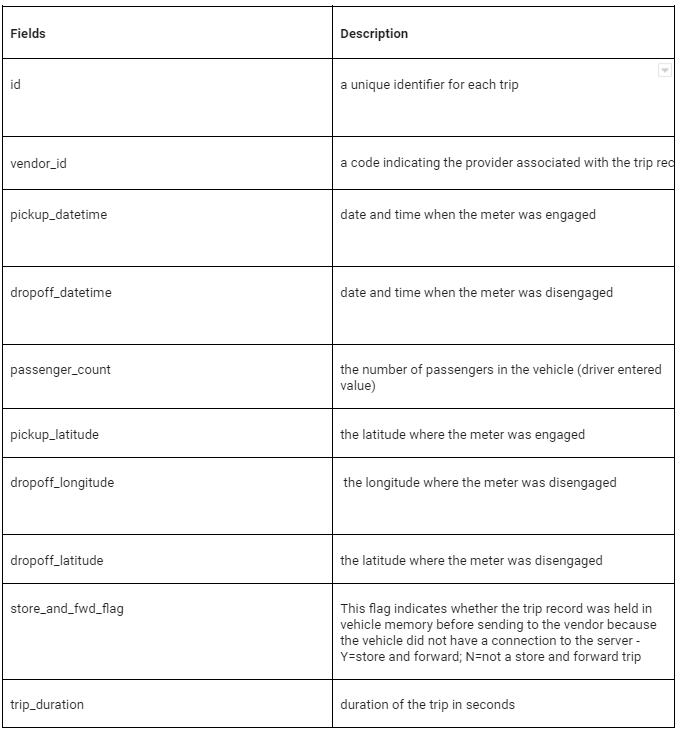

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in first_df.columns:
  print(f' The unique values in column {i} is {first_df[i].nunique()}')

 The unique values in column id is 1458644
 The unique values in column vendor_id is 2
 The unique values in column pickup_datetime is 1380222
 The unique values in column dropoff_datetime is 1380377
 The unique values in column passenger_count is 10
 The unique values in column pickup_longitude is 23047
 The unique values in column pickup_latitude is 45245
 The unique values in column dropoff_longitude is 33821
 The unique values in column dropoff_latitude is 62519
 The unique values in column store_and_fwd_flag is 2
 The unique values in column trip_duration is 7417


## 3. ***Data Wrangling***

### Data Wrangling Code

#### **What are the number of rides taken by each vendor?**

In [ ]:
# Write your code to make your dataset analysis ready.
first_df['vendor_id'].unique()

array([2, 1])

In [ ]:
vendor_df=first_df.groupby('vendor_id')['id'].count()
vendor_df

vendor_id
1    678342
2    780302
Name: id, dtype: int64


> **So first vendor is a little shallow in market depth. The market penetration of second vendor is more than first vendor. Though the difference is very little.**

#### **What number of passengers are most frequent in taking taxies?**

In [ ]:
Passen_df=first_df.groupby('passenger_count')['id'].count()
Passen_df

passenger_count
0         60
1    1033540
2     210318
3      59896
4      28404
5      78088
6      48333
7          3
8          1
9          1
Name: id, dtype: int64


> **From the above output, taxi trips with zero passenger have occured 60 times , which is not possible. May be the driver have missed to enter the passenger count.**

> **There are 3 trips with seven passengers, and one trip each with 8 and 9 passenger.**

> **If we assume that there are 5 adults and one small children allowed on the lap of a adult maximum 6 passengers can be possible.**

> **Remaining might be the outliers.**

#### **What is the count for network failure and loose connection?**

In [ ]:
conn_df=first_df['store_and_fwd_flag'].value_counts()
conn_df

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64


> **So near about 8000 times the taxies have lost their connection and saved the trip information to them only, without sharing it with their server.**

#### **Which vendor have failed in connecting with servers maximum times?**

In [ ]:
server_df=first_df.groupby(['vendor_id','store_and_fwd_flag'])['id'].count()
server_df

vendor_id  store_and_fwd_flag
1          N                     670297
           Y                       8045
2          N                     780302
Name: id, dtype: int64


> **We can very clearly see here that all the network failures are contributed by first vendor only whose market depth was less than the second vendor.**

> **So this lack of efficiency and effectivity in technology equipments by first vendor, might be the reason behind its less market penetration**

#### **Converting the given lattitude and longitude to the real time locations and then calculating the distance travlled by the taxies for individual trips.**

In [ ]:
def degrees(lat1,lon1,lat2,lon2):
  '''This function uses the given lattitude and longitude to produce the distance travelled by the taxies
     for respective co-ordinates.'''

  lat1= radians(lat1)  # Converting the lattitude to radians first.
  lat2 = radians(lat2)
  lon1 = radians(lon1)
  lon2 = radians(lon2)

  radius = 6347        # Actual Radius of the Earth.
  dlat= (lat2-lat1)
  dlon= (lon2-lon1)

  a = sin(dlat/2)**2 + (sin(dlon/2)**2) * cos(lat1) * cos(lat2)
  c = 2* asin(sqrt(a))

  return radius*c # The distance of the trip.

In [ ]:
second_df=first_df.reset_index()
for a,b,c,d,e in second_df[['index','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']].values:
  second_df['index'][a] = degrees(b,c,d,e)

In [ ]:
# Dropping the already used co-ordinates columns and renaming the index column as oer or requirement.
third_df=second_df.drop(['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'],axis=1)
third_df.rename(columns={'index':'distance_travelled'},inplace=True)

In [ ]:
third_df


,distance_travelled,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration
0,1.492876,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,N,455
1,1.798706,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,N,663
2,6.361045,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,N,2124
3,1.479902,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,N,429
4,1.184111,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,N,435
...,...,...,...,...,...,...,...,...
1458639,1.220465,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,N,778
1458640,6.027045,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,N,655
1458641,7.795130,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,N,764
1458642,1.088448,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,N,373


####**Time series analysis of the Dataset**

In [ ]:
third_df['pickup_datetime']=pd.to_datetime(third_df['pickup_datetime'])

In [ ]:
third_df['dropoff_datetime']=pd.to_datetime(third_df['dropoff_datetime'])

In [ ]:
third_df['pickup_month']=third_df['pickup_datetime'].dt.month
third_df['pickup_day']=third_df['pickup_datetime'].dt.day
third_df['pickup_hour']=third_df['pickup_datetime'].dt.hour
third_df['pickup_minute']=third_df['pickup_datetime'].dt.minute
third_df['pickup_seconds']=third_df['pickup_datetime'].dt.second

In [ ]:
third_df['dropoff_month']=third_df['dropoff_datetime'].dt.month
third_df['dropoff_day']=third_df['dropoff_datetime'].dt.day
third_df['dropoff_hour']=third_df['dropoff_datetime'].dt.hour
third_df['dropoff_minute']=third_df['dropoff_datetime'].dt.minute
third_df['dropoff_seconds']=third_df['dropoff_datetime'].dt.second

**The very important factor in the dataset is pickup time and drop time. I have converted this feature into desirable and handalable type.**

In [ ]:
third_df.trip_duration.groupby(pd.cut(third_df.trip_duration, np.arange(1,max(third_df.trip_duration),3600))).count()[:30]

trip_duration
(1, 3601]           1446313
(3601, 7201]          10045
(7201, 10801]           141
(10801, 14401]           35
(14401, 18001]            5
(18001, 21601]           11
(21601, 25201]           11
(25201, 28801]           13
(28801, 32401]           17
(32401, 36001]            8
(36001, 39601]           13
(39601, 43201]            6
(43201, 46801]            8
(46801, 50401]            5
(50401, 54001]            7
(54001, 57601]            5
(57601, 61201]           10
(61201, 64801]           10
(64801, 68401]           10
(68401, 72001]            5
(72001, 75601]           10
(75601, 79201]           17
(79201, 82801]           63
(82801, 86401]         1839
(86401, 90001]            0
(90001, 93601]            0
(93601, 97201]            0
(97201, 100801]           0
(100801, 104401]          0
(104401, 108001]          0
Name: trip_duration, dtype: int64

> **There are some trips with more than 24 hours of travel duration i.e. 86400 seconds. Which might have occured on weekends for the outstation travels.**\
> **Major chunk of trips are completed within an interval of 1 hour with some good numbers of trips duration going above 1 hour.**

In [ ]:
'''86400 seconds meaning 24 hours, Following trips are '''

third_df[third_df.trip_duration > 86400]

,distance_travelled,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_seconds,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,dropoff_seconds
355003,20.072763,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,N,1939736,1,5,0,19,42,1,27,11,8,38
680594,5.959951,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,N,2049578,2,13,22,38,0,3,8,15,57,38
924150,1.628968,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,N,2227612,1,5,6,14,15,1,31,1,1,7
978383,19.825694,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,N,3526282,2,13,22,46,52,3,25,18,18,14


>**These trips ran for more than 20 days, which seems unlikely by the distance travelled.**
> **All the trips are taken by vendor 1 which points us to the fact that this vendor might allows much longer trip for outstations.**\
> **All these trips are either taken on Tuesday's in 1st month or Saturday's in 2nd month. There might be some relation with the weekday, pickup location, month and the passenger.**
> **But they fail our purpose of correct prediction and bring inconsistencies in the algorithm calculation.**

#### **What is the variation in distance travelled by the passengers.**

In [ ]:
array=np.arange(10,101,10)

In [ ]:
Num_of_trips=[]
for j,i in enumerate(np.arange(10,101,10)):
  Z=third_df[third_df['distance_travelled'] >i]  
  Num_of_trips.append(len(Z))

In [ ]:
a = pd.DataFrame(array,Num_of_trips).reset_index()
distance_df=a.rename(columns={'index':'Number_of_trips',0:'Distance_more'})
distance_df

,Number_of_trips,Distance_more
0,88403,10
1,23095,20
2,562,30
3,185,40
4,87,50
5,62,60
6,35,70
7,25,80
8,22,90
9,19,100


In [ ]:
print('The total number of trips having more than 10km of travel distance are' ,distance_df['Number_of_trips'].sum())

The total number of trips having more than 10km of travel distance are 112495


> **The number of trips having distance more than 100km are 19.It might be the out of city trips or overnight trips.**

> **So from the above chart we can say that, for the taxi businesses there are very less opportunities in long trips.**

> **from 14 lakh trips only 1.2 lakh trips are long journey trips with more than 10km travel distance.**


#### **What are the number of taxi trips per day?**

**The study of datset is just restricted to the six months of the year 2016.**

In [ ]:
third_df['pickup_month_name']=third_df['pickup_datetime'].dt.month_name()
third_df['dropoff_month_name']=third_df['dropoff_datetime'].dt.month_name()

In [ ]:
trip_num_df=third_df.groupby(['pickup_month_name','pickup_day'])['distance_travelled'].count().reset_index()
trip_num_df

,pickup_month_name,pickup_day,distance_travelled
0,April,1,8640
1,April,2,9325
2,April,3,8084
3,April,4,7891
4,April,5,8389
...,...,...,...
177,May,27,7530
178,May,28,7004
179,May,29,6372
180,May,30,5570


In [ ]:
trip_num_df['distance_travelled'].min(),trip_num_df['distance_travelled'].max()

(1648, 9796)

> **So we can see that taxies travel from 1648 to 9796 times per day.**
**We need to remember that the above analysis is a cumulative figure of all the months.** 

#### **What is the maximum distance travelled by taxies per day in all the six months.?**

In [ ]:
dist_df=third_df.groupby(['pickup_month_name','pickup_day'])['distance_travelled'].max().reset_index()
dist_df

,pickup_month_name,pickup_day,distance_travelled
0,April,1,32.619324
1,April,2,318.919839
2,April,3,26.971163
3,April,4,68.899597
4,April,5,43.072865
...,...,...,...
177,May,27,36.464501
178,May,28,44.946005
179,May,29,47.862065
180,May,30,62.096264


**So the max ditsance travelled by the taxies per day is quite high**
> **From this we could conclude that the long journeys are quite frequent and there is sufficient business for long taxi trips.**

#### **What is the on an average distance travelled by the taxies per day.**

In [ ]:
avg_dist=third_df.groupby(['pickup_month_name','pickup_day'])['distance_travelled'].mean().round().reset_index()
avg_dist

,pickup_month_name,pickup_day,distance_travelled
0,April,1,3.0
1,April,2,3.0
2,April,3,4.0
3,April,4,3.0
4,April,5,3.0
...,...,...,...
177,May,27,3.0
178,May,28,4.0
179,May,29,4.0
180,May,30,4.0


In [ ]:
avg_dist['distance_travelled'].unique()

array([3., 4.])

> **So on an average taxies show very less variation in distance travelled.**
**They are either travelling 3km or 4km.**

#### **Find out on which hour of day taxies are bussiest.**

In [ ]:
hour_df=third_df.groupby('pickup_hour')['distance_travelled'].count().reset_index()
hour_df

,pickup_hour,distance_travelled
0,0,53248
1,1,38571
2,2,27972
3,3,20895
4,4,15792
5,5,15002
6,6,33248
7,7,55600
8,8,67053
9,9,67663


> **It is astonishing to know about the high frequency of taxi bookings at midnight 12:00 AM.**\
**We also got to know that people take maximum number of taxies at evening 6:00 PM**

#### **Find out which day of the week is busiest**

In [ ]:
third_df['pickup_day_name']=third_df['pickup_datetime'].dt.day_name()

In [ ]:
week_df=third_df.groupby('pickup_day_name')['distance_travelled'].count().reset_index()
week_df1=week_df.rename(columns={'distance_travelled':'Number_of_trips'})
week_df1

,pickup_day_name,Number_of_trips
0,Friday,223533
1,Monday,187418
2,Saturday,220868
3,Sunday,195366
4,Thursday,218574
5,Tuesday,202749
6,Wednesday,210136


> **So Friday and Saturday shows the maximum booking for taxi trips.So it might be possible that apart from office trips, people are planning long trips on weekends.**\
**We also have seen that the long journeys with distance more than 50 km are significantly high.**

### What all manipulations have you done and insights you found?

**For calculting the various insights and values mostly I used the groupby funtion of pandas,describe funtion to gain a basic overview of the outliers present in the dataset and some other basic functionalities.**
> **I found out that the vendor first require to work upon some new technologies and improve its user experience.**

> **I have found out that there are some trips which require more than a day to complete.**

> **there are some trips with more than 500 km travel distance. It means taxies of NYC have been used for short journeys, medium distance journeys and even for long journeys.**

>**We have found out that at 6PM the taxies are bussiest.These peak time again accumulated on week ends.**

> **Again one astonishing fact which we have found in our EDA is, the taxies on an average travel the same distance daily. When I find the mean for all the distance travelled by taxies, the output was either 3 or 4.**



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Visualization For Pick up and Drop off Locations

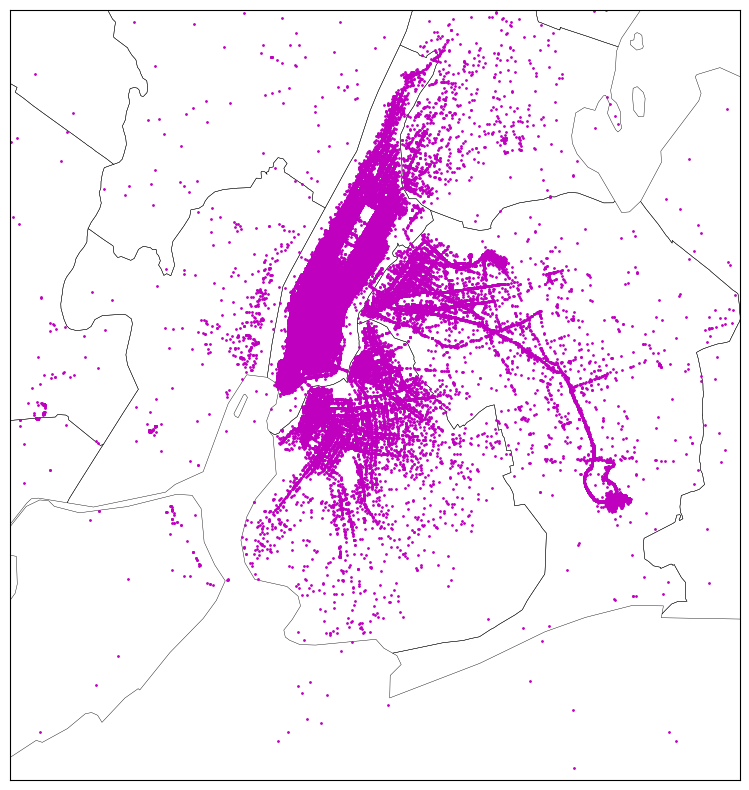

In [ ]:
plt.figure(figsize=(15,10))
from mpl_toolkits.basemap import Basemap

# Set the limits of the map to the minimum and maximum coordinates
lat_min = 40.5
lat_max = 40.9
lon_min = -74.2
lon_max = -73.7

# Set the center of the map
cent_lat = (lat_min + lat_max) / 2
cent_lon = (lon_min + lon_max) / 2

#Create the Basemap object with required params.
map = Basemap(llcrnrlon=lon_min,
              llcrnrlat=lat_min,
              urcrnrlon=lon_max,
              urcrnrlat=lat_max,
              resolution='l',
              projection='lcc',
              lat_0 = cent_lat,
              lon_0 = cent_lon)

#Style the map
map.drawcounties(linewidth=0.3)

#Fetch the long and lat in form of array
long = np.array(first_df["pickup_longitude"])
lat = np.array(first_df["pickup_latitude"])

x, y = map(long, lat)
map.plot(x, y,'mo', markersize=1, alpha=1)
plt.xticks()
plt.show()

> **We can see that most of the taxi pickups were done in the manhattan area as compared to the other areas in NYC.**\
**A long trail towards the airport shows that the airport is situated quite far from the Manhattan area.**\
**There must have been some long distance rides towards and from the airport.**\
**Similarly the average duration for the rides picked-up to or for the airport would have been longer.**

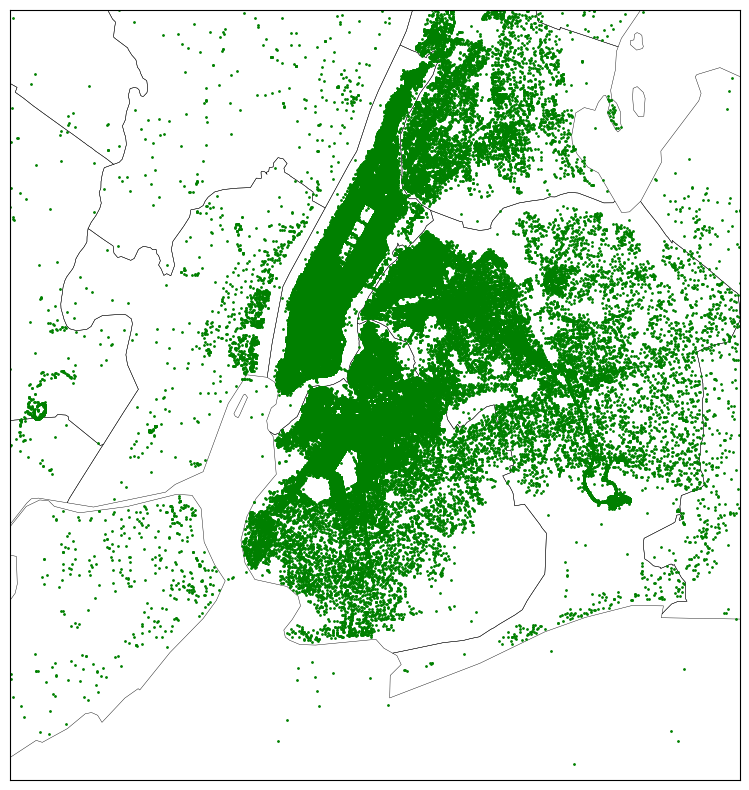

In [ ]:
plt.figure(figsize=(15,10))
from mpl_toolkits.basemap import Basemap

# Set the limits of the map to the minimum and maximum coordinates
lat_min = 40.5
lat_max = 40.9
lon_min = -74.2
lon_max = -73.7

# Set the center of the map
cent_lat = (lat_min + lat_max) / 2
cent_lon = (lon_min + lon_max) / 2

#Create the Basemap object with required params.
map = Basemap(llcrnrlon=lon_min,
              llcrnrlat=lat_min,
              urcrnrlon=lon_max,
              urcrnrlat=lat_max,
              resolution='l',
              projection='lcc',
              lat_0 = cent_lat,
              lon_0 = cent_lon)

#Style the map
map.drawcounties(linewidth=0.3)

#Fetch the long and lat in form of array
long = np.array(first_df["dropoff_longitude"])
lat = np.array(first_df["dropoff_latitude"])

x, y = map(long, lat)
map.plot(x, y,'go', markersize=1, alpha=1)
plt.xticks()
plt.show()

> **Dropoff's are much more distributed around the NYC area where still most of the dropoff's were done in the Manhattan.**\
**So we can conclude that, pickups are concentrated in less number of areas and drop offs are more varied and spreaded.**

#### Chart - 1 - Distribution Plot for a basic overview of all the features.

The desired column for distribution plot

In [ ]:
columns=[i for i in third_df.columns if i not in ['store_and_fwd_flag','pickup_day_name','dropoff_month_name',
                                                  'dropoff_datetime','pickup_datetime','id','pickup_month_name']]

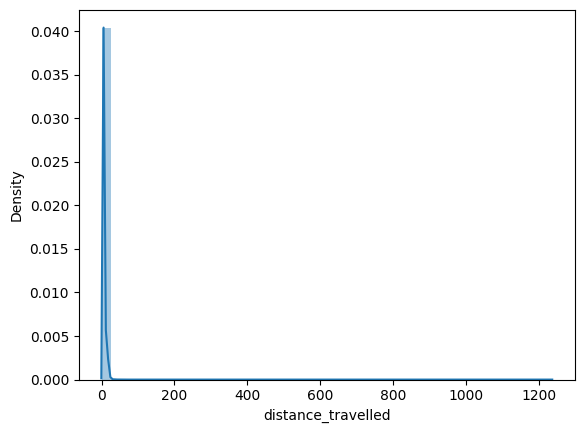

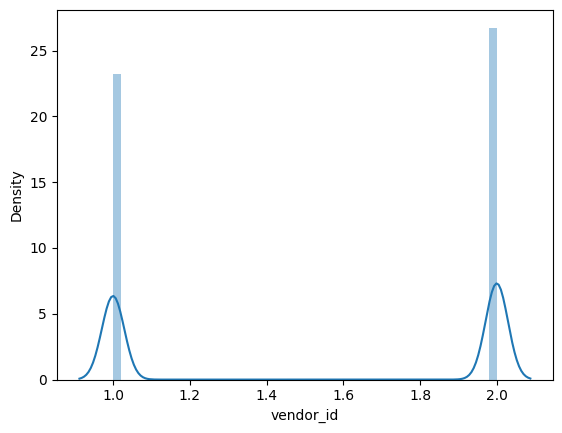

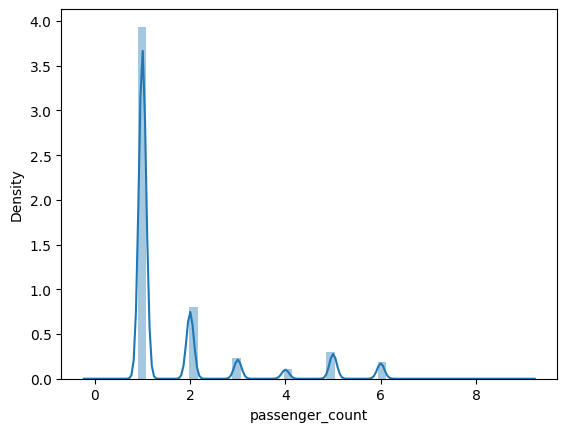

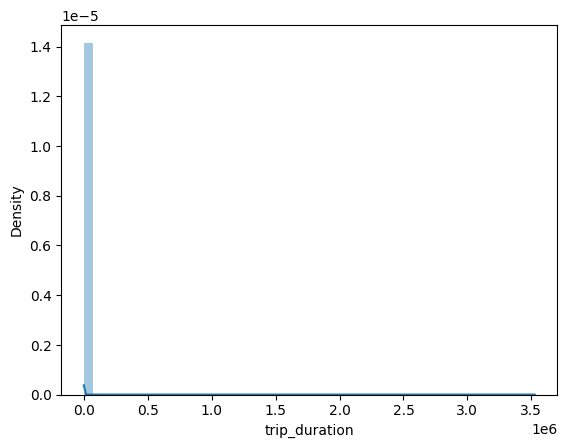

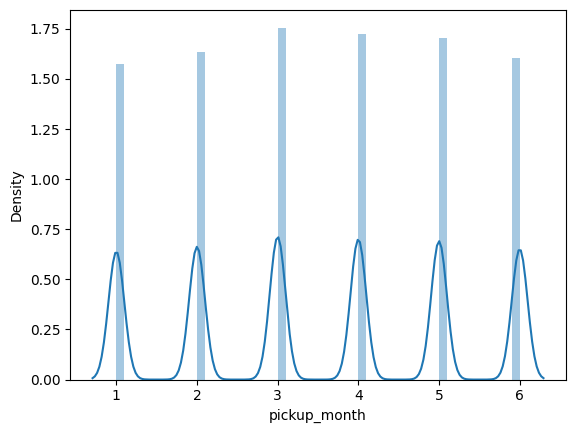

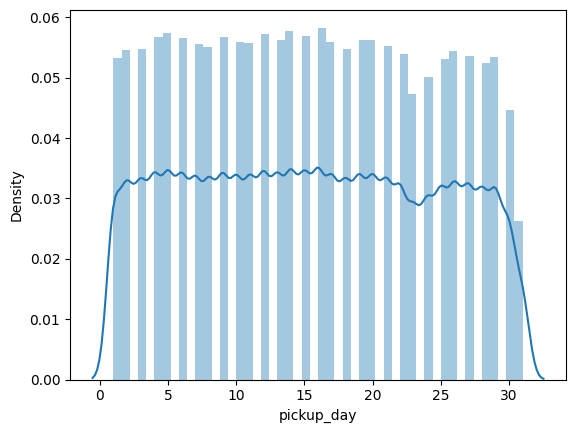

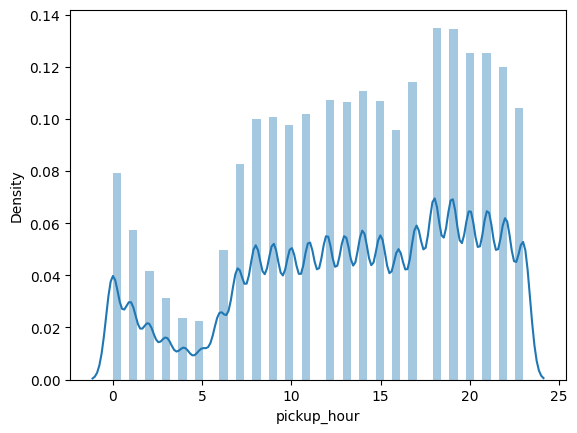

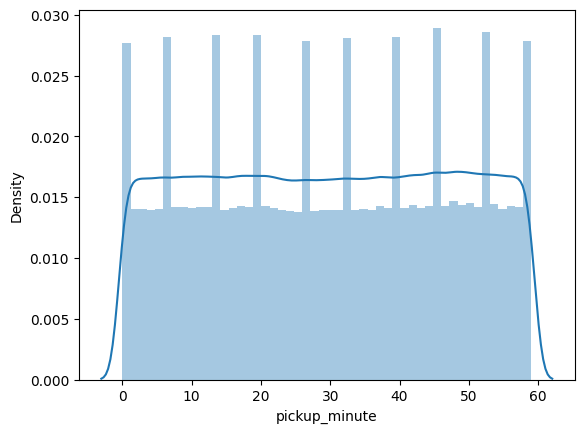

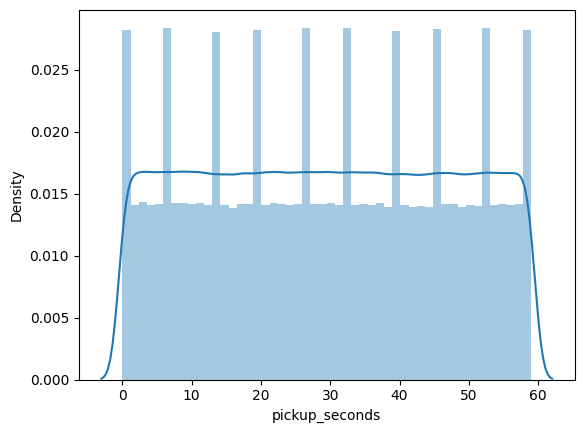

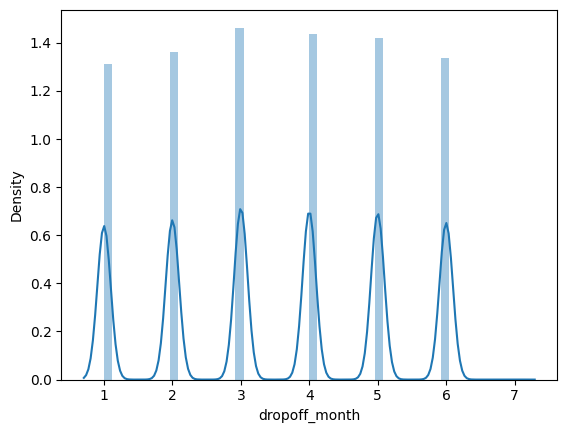

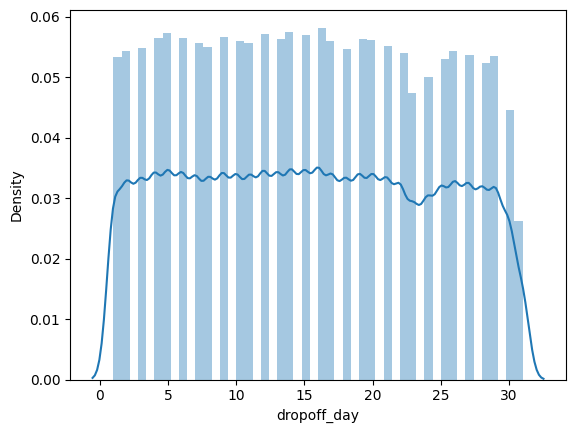

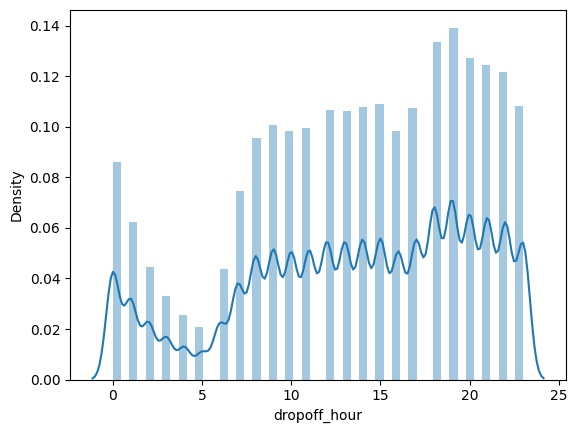

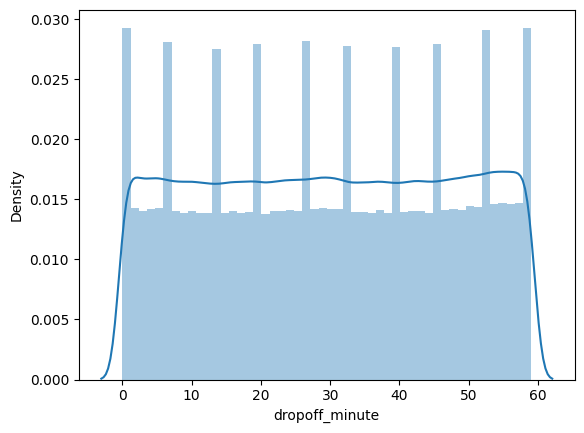

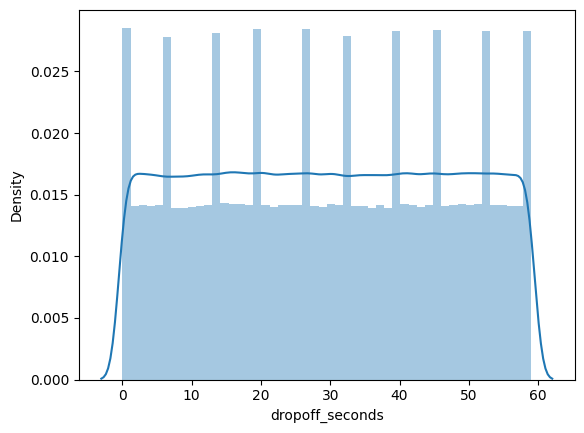

In [ ]:
# Chart - 1 visualization code
for i in columns:
  sns.distplot(third_df[i])
  plt.show()

> **This Chart is the best choice to show the distribution of all the features.**

> **Some features like distance travelled, passenger count and trip duration are skew symmetric.**

> **Whereas drop off seconds , drop off minute , dropoff hour,drop off day,pick up seconds,pick up minute, pick up hour,pick up day show the uniform distribution.**

> **The study of distribution shows the arrangement of all the data points in the features. It helps to improve our prediction model.**

#### Chart - 2 plotting the number of trips involved by each vendor

In [ ]:
# Chart - 2 visualization code
vendor_df1=vendor_df.reset_index()
vendor_df1

,vendor_id,id
0,1,678342
1,2,780302


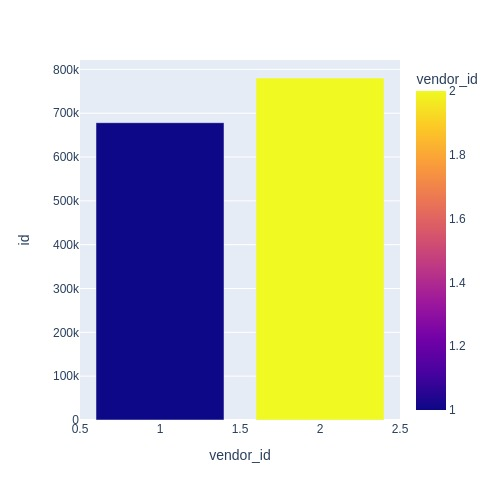

In [ ]:
fig = px.bar(vendor_df1, x='vendor_id', y='id',color='vendor_id')
fig.update_layout(width=500,height=500)
fig.show('jpg')


**As there are only two columns two bars are sufficient for showing the vendors.**



**The market penetration of first vendor is less than the second one.**

#### Chart - 3 Plotting for the number of passengers and counting their taxi trips

In [ ]:
# Chart - 3 visualization code
Passen_df1=Passen_df.reset_index()
Passen_df1

,passenger_count,id
0,0,60
1,1,1033540
2,2,210318
3,3,59896
4,4,28404
5,5,78088
6,6,48333
7,7,3
8,8,1
9,9,1


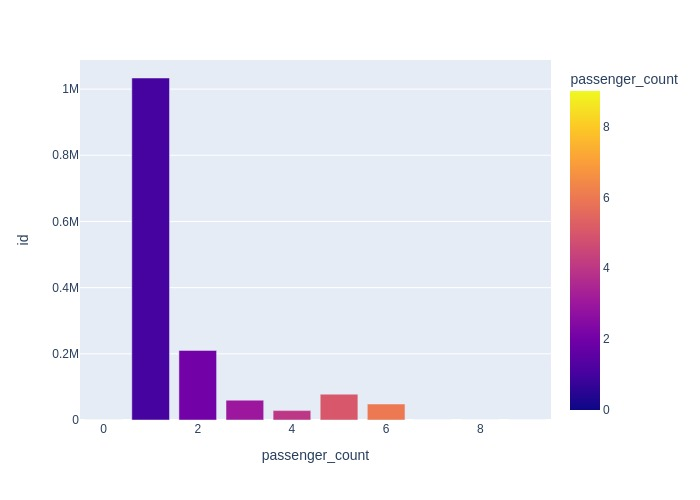

In [ ]:
fig=px.bar(Passen_df1,x='passenger_count',y='id',color='passenger_count')
fig.show('jpg')


**For showing the taxi booking trends.**


**Despite having 8 and 9 passenger count, maximum number of taxies are booked by single passengers.**


**It shows the business is dominant in single passenger bookings and companies should focus on single passengers trips.**

#### Chart - 4 Ploting for those vendors who lost their connections

In [ ]:
# Chart - 4 visualization code
conn_df

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

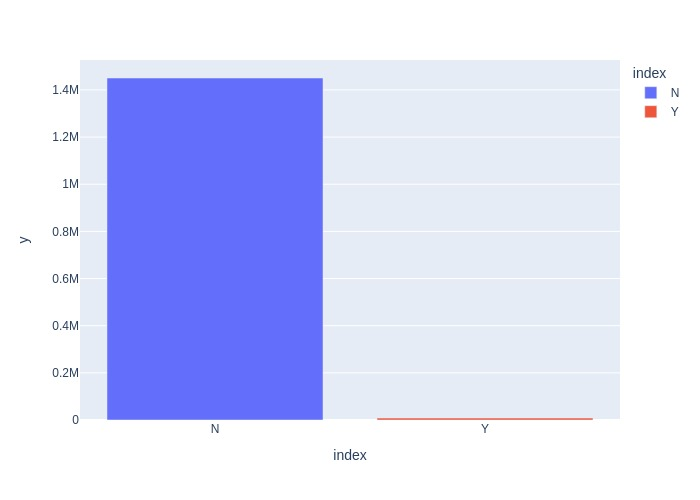

In [ ]:
fig=px.bar(conn_df,x=conn_df.index ,y= conn_df,color=conn_df.index)
fig.show('jpg')


**It has been found out that their are total 8045 instances when the taxies are failed to connect to their servers.**


**It will help businesses to improve upon their customer services.**

#### Chart - 5 plotting for visualization of number of trips in which taxies failed to connect with their servers.

In [ ]:
# Chart - 5 visualization code
server_df1=server_df.reset_index()
server_df1

,vendor_id,store_and_fwd_flag,id
0,1,N,670297
1,1,Y,8045
2,2,N,780302


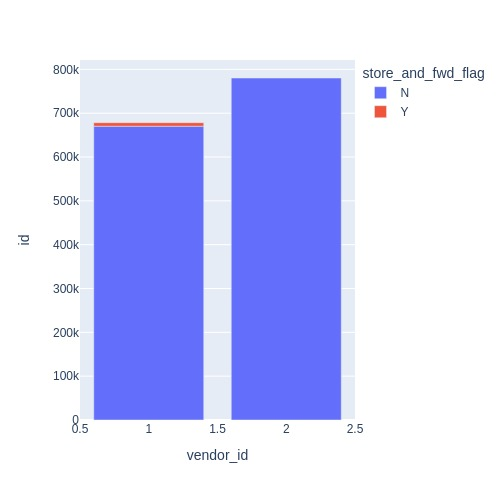

In [ ]:
fig=px.bar(server_df1, x='vendor_id',y='id',color='store_and_fwd_flag')
fig.update_layout(width=500,height=500)
fig.show('jpg')


> **this graphs is doing the justice to the lost connections of taxies. It says all the connections are lost by only vendor 1**.

> **We had seen that the market penetration of first one is lesser than the second one.**

> **The less utilization of advanced technologies and comparatively older service approach might be the reason behind market backwardness of first vendor.**


> **Graph helps the first vendor to improve upon their services.**

#### Chart - 6 The visualization for the number of trips according to the distance they travelled.

In [ ]:
for i,j in enumerate(distance_df['Distance_more']):
  distance_df['Distance_more'][i]= str(j) + 'km'

In [ ]:
# Chart - 6 visualization code
distance_df

,Number_of_trips,Distance_more
0,88403,10kmkm
1,23095,20kmkm
2,562,30kmkm
3,185,40kmkm
4,87,50kmkm
5,62,60kmkm
6,35,70kmkm
7,25,80kmkm
8,22,90kmkm
9,19,100kmkm


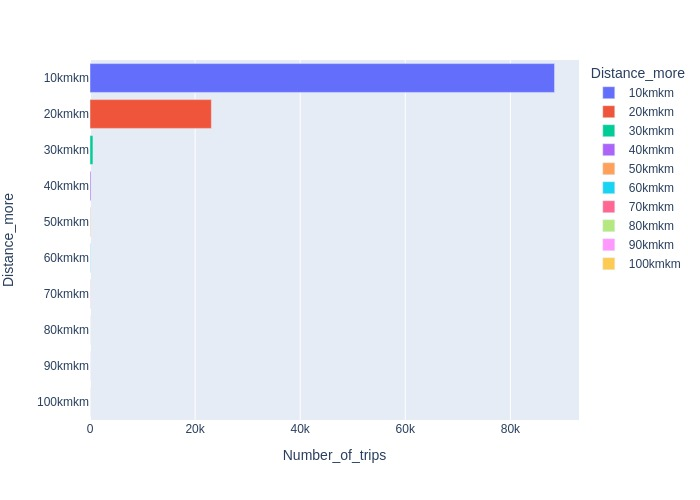

In [ ]:
fig=px.bar(distance_df,x='Number_of_trips',y='Distance_more',color='Distance_more')
fig.show('jpg')

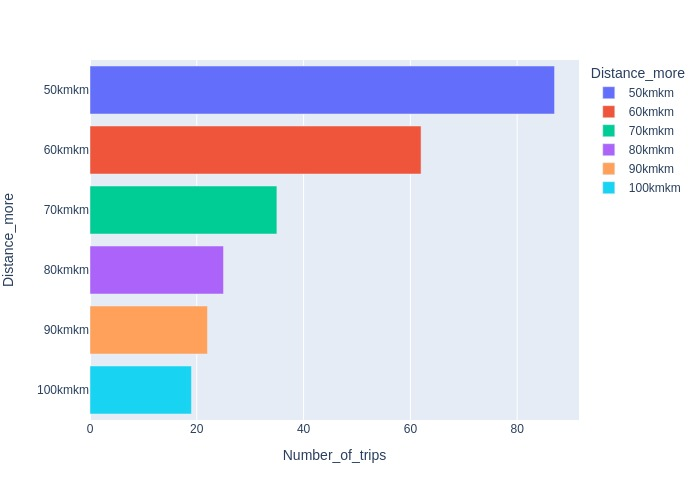

In [ ]:
fig=px.bar(distance_df[4:],x='Number_of_trips',y='Distance_more',color='Distance_more')
fig.show('jpg')


**I wanted to show the two graphs for earlier large values and to represent the small values different graph.**


> **There are 19 trips which goes for more than 100km**
**We know that the small trips are dominant but we also know that some trips require more than 24 hrs to complete.**
> **So we can coverge our both the findings. So we can conclude those with more than 100km distance may took large amount of time to complete.**

#### Chart - 7 Plot for the number of taxi trips per day

In [ ]:
# Chart - 7 visualization code
trip_num_df1=trip_num_df.rename(columns={'distance_travelled':'Number_of_trips'})
trip_num_df1

,pickup_month_name,pickup_day,Number_of_trips
0,April,1,8640
1,April,2,9325
2,April,3,8084
3,April,4,7891
4,April,5,8389
...,...,...,...
177,May,27,7530
178,May,28,7004
179,May,29,6372
180,May,30,5570


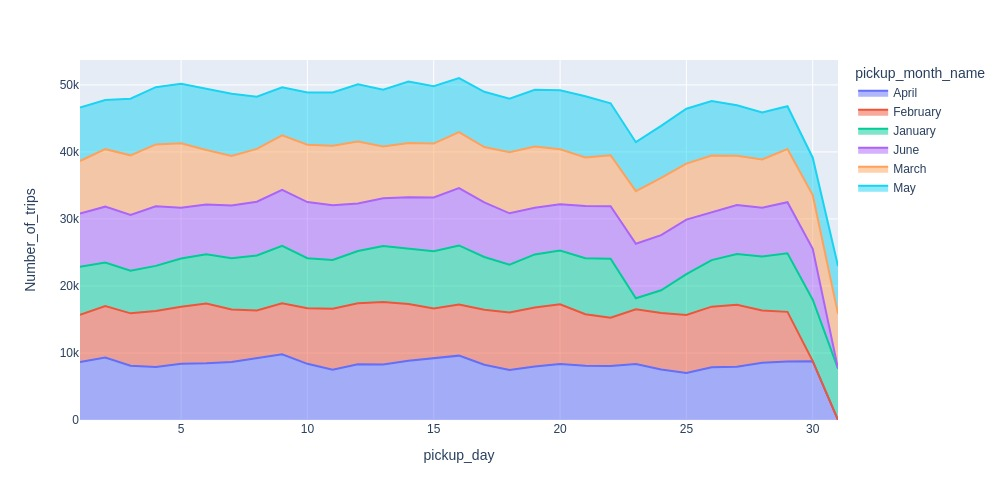

In [ ]:
fig=px.area(trip_num_df1,x='pickup_day',y='Number_of_trips',color='pickup_month_name')
fig.update_layout(width=1000,height=500)
fig.show('jpg')


**Area chart gives a glimpse of flow which is present in the dataset.**


**So we can see that taxies travel from 1648 to 9796 times per day. We need to remember that the above analysis is a cumulative figure of all the months**
**A kind of similar pattern follows throughout the months.**

#### Chart - 8 The maximum distance per day by taxies.

In [ ]:
# Chart - 8 visualization code
dist_df1=dist_df.rename(columns={'distance_travelled':'max_distance'})
dist_df1

,pickup_month_name,pickup_day,max_distance
0,April,1,32.619324
1,April,2,318.919839
2,April,3,26.971163
3,April,4,68.899597
4,April,5,43.072865
...,...,...,...
177,May,27,36.464501
178,May,28,44.946005
179,May,29,47.862065
180,May,30,62.096264


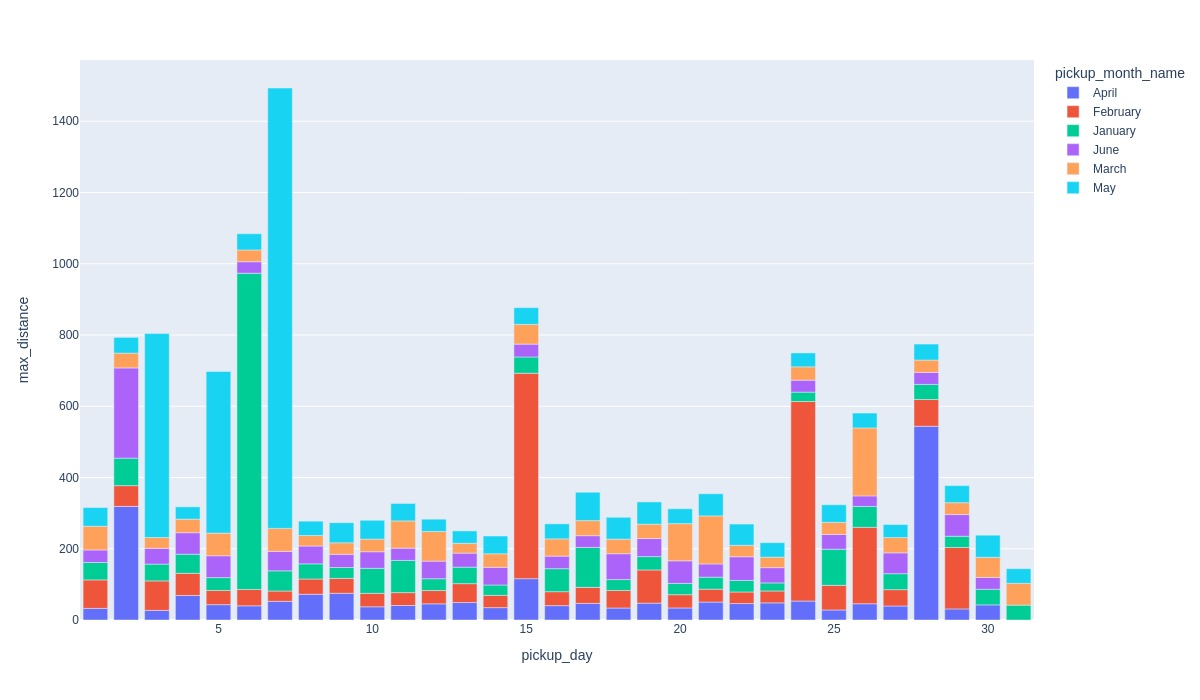

In [ ]:
fig=px.bar(dist_df1,x='pickup_day',y='max_distance',color='pickup_month_name')
fig.update_layout(width=1200,height=700)
fig.show('jpg')


**This chart gives the idea about all the maximum distances at once from all the months.**


> **We can see there are certain trips which are even more than 500 km.**

> **In the month of february there are two trips which are more than 500 km.**

> **In the month of may there is one trip with 1200 km.**

> **So we can conclude that the people occassionally use taxies for very long journeys.**


> **By knowing this fact that, people use taxies for very long journeys, taxi bussinesses can be optimized for long journeys, so that the cost for journeys be reduced and people could use more public transport.**

#### Chart - 9 The average distance involved by taxies per day.

In [ ]:
# Chart - 9 visualization code
avg_dist

,pickup_month_name,pickup_day,distance_travelled
0,April,1,3.0
1,April,2,3.0
2,April,3,4.0
3,April,4,3.0
4,April,5,3.0
...,...,...,...
177,May,27,3.0
178,May,28,4.0
179,May,29,4.0
180,May,30,4.0


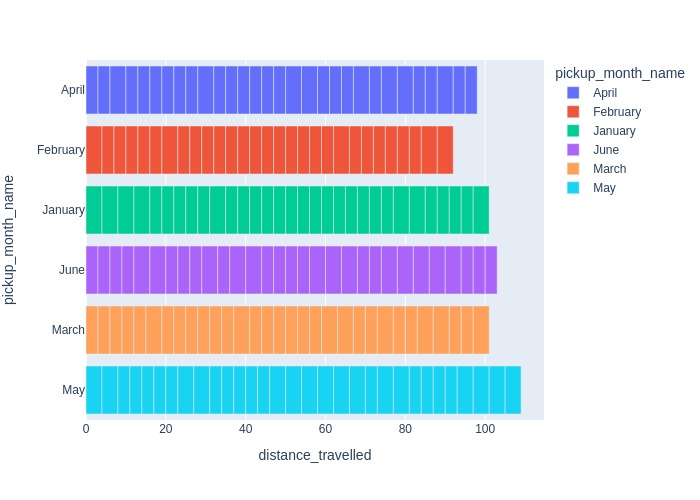

In [ ]:
fig=px.bar(avg_dist,x='distance_travelled',y='pickup_month_name',color='pickup_month_name')
fig.show('jpg')


> **The graph shows only two types of values.**
> **It means on an average taxies run either 3 km or 4km per day.**
> **So the taxies are having same amount of business on every day with some occassional highs and lows.**

#### Chart - 10 The Graph for hourly involvement of taxies in journey.

In [ ]:
for i,j in enumerate(hour_df['pickup_hour']):
  hour_df['pickup_hour'][i]= str(j)+' o clock'

In [ ]:
# Chart - 10 visualization code
hour_df

,pickup_hour,distance_travelled
0,0 o clock o clock,53248
1,1 o clock o clock,38571
2,2 o clock o clock,27972
3,3 o clock o clock,20895
4,4 o clock o clock,15792
5,5 o clock o clock,15002
6,6 o clock o clock,33248
7,7 o clock o clock,55600
8,8 o clock o clock,67053
9,9 o clock o clock,67663


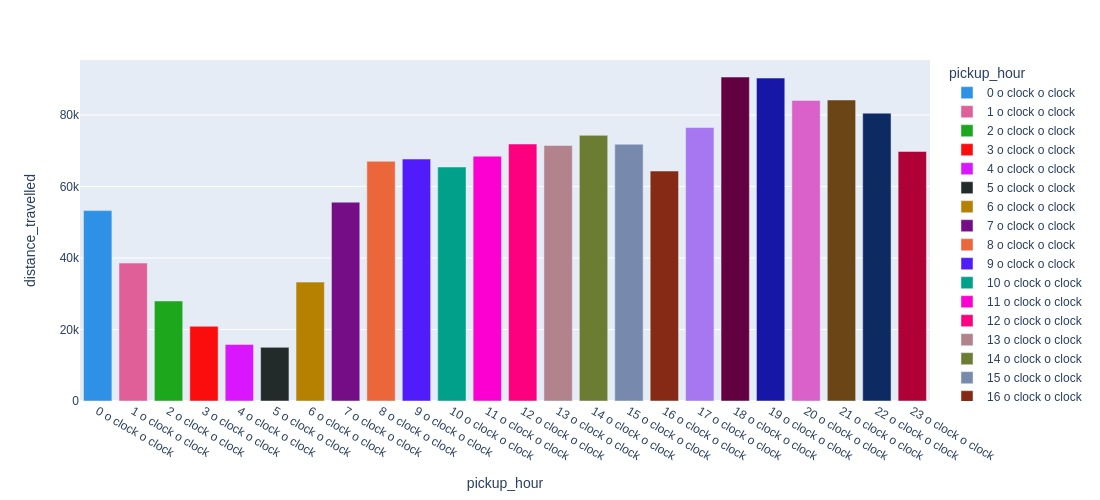

In [ ]:
fig=px.bar(hour_df,x='pickup_hour',y='distance_travelled',color='pickup_hour',color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_layout(width=1100,height=500)
fig.show('jpg')


**different colors shows the trend of increasing energy consumption.**


**From 6 PM the number of taxi trips are increases upto 9 PM and after midnight 12AM the number of taxi trips decreases upto 6 AM morning.**


**understanding the timing of demands of taxies is important to improve upon the businesses.**

#### Chart - 11 Plot for showing which day of week shows maximum number of trips.

In [ ]:
# Chart - 11 visualization code
week_df1

,pickup_day_name,Number_of_trips
0,Friday,223533
1,Monday,187418
2,Saturday,220868
3,Sunday,195366
4,Thursday,218574
5,Tuesday,202749
6,Wednesday,210136


<Axes: xlabel='pickup_day_name', ylabel='Number_of_trips'>

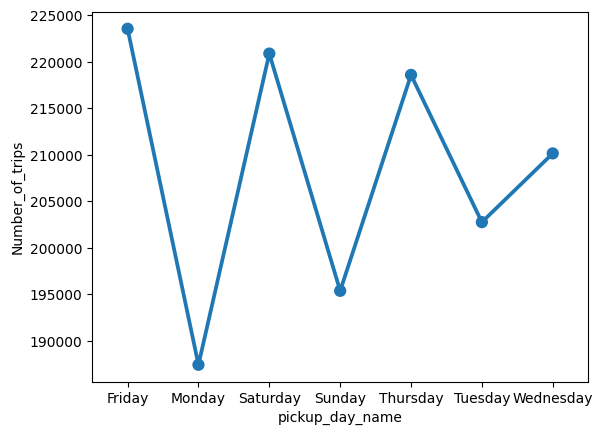

In [ ]:
sns.pointplot( x=week_df['pickup_day_name'],y=week_df1['Number_of_trips'])


**From the chart we can understand the taxi trips on friday are maximum and on monday it is minimum.**

#### Chart - 12 - Correlation Heatmap

<Axes: >

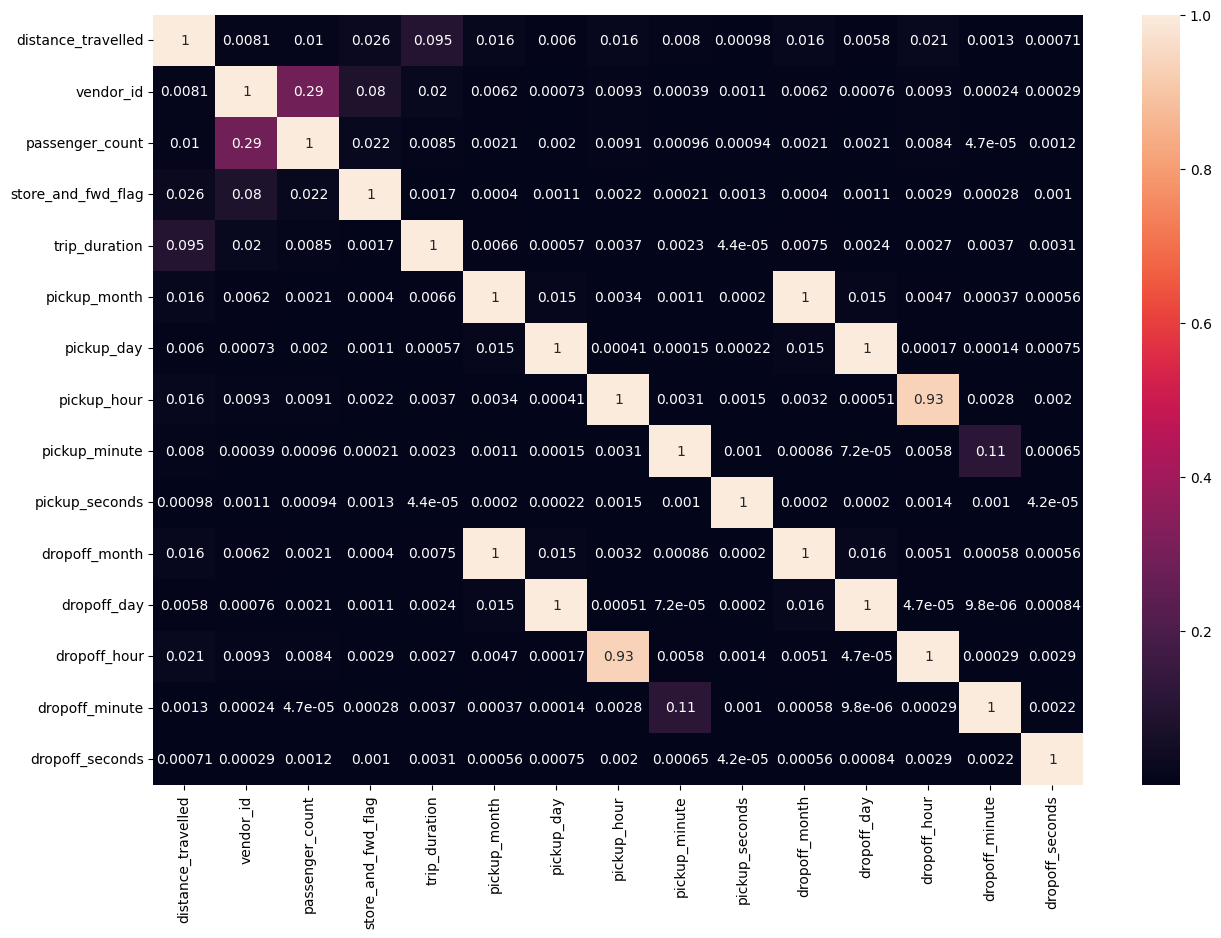

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
corr=third_df.corr()
sns.heatmap(abs(corr),annot=True)

> **We can see that the matrix represent a beautiful correlation between all the features.**
> **So there is a very strong  correlation between pickup month and drop off month,pickup day and drop off day, pichup hour and drop off hour.**
> **So we can expect this correlation between the given features and out of 14 features only 3 features shows strong correlation.**
> **Hence I am tolerating the presence of these three features and considering them inthe model prediction.**

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Let's say, I went to New York and asked few questions to  a taxi driver about the duration they required to complete one taxi trip. He answered that they require a MEAN of all the time required by all the taxies for that day.**
**Now I want to evaluate the correctness of taxi driver's statement.**

> So we know one thing here that this statement can be possible for some events but on some it may not. So I would check whether the hypothetical statement of driver is true for 50 % of the observations or it stands for more than 50 %.

**H0 : time of one trip >= mean of trip duration per day for more than 50% observations**\
**HA : time of one trip <= mean of trip duration per day for less than 50% observations**


In [ ]:
'''I would require to calculate the mean of trip duration for every day of each 6 months. That mean would be compared with the every data point 
of our parent Dataset.'''


Hypo_df=third_df.groupby(['pickup_month_name','pickup_day'])['trip_duration'].mean().reset_index()
Hypo_df

,pickup_month_name,pickup_day,trip_duration
0,April,1,939.189931
1,April,2,924.914102
2,April,3,927.563335
3,April,4,919.606640
4,April,5,1015.086542
...,...,...,...
177,May,27,956.633732
178,May,28,962.022987
179,May,29,871.108757
180,May,30,820.148654


**This is our desired Dataset. we would calibarate these points with every day of every month. For e.g We would check whether the trip duration of one taxi on April first is greater than its mean. I would compare that value with the above dataset.**

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
'''I would perform the statistical test on a random sample of 2.5 lakh datapoints.'''

random_sample = third_df[['pickup_month_name','pickup_day','trip_duration']].sample(250000)

'''Now we would check if the trip duration of our random sample is greater than the daily mean.'''

duration_list=[]
for ran_mon, ran_day, ran_du in zip(random_sample['pickup_month_name'],random_sample['pickup_day'],random_sample['trip_duration']):

  for hypo_month, hypo_day, hypo_du in zip(Hypo_df['pickup_month_name'],Hypo_df['pickup_day'],Hypo_df['trip_duration']):

    if ran_mon==hypo_month and ran_day==hypo_day and ran_du >= hypo_du :
      duration_list.append(ran_du)

proportion_random = len(duration_list)/len(random_sample)
print('The Proportion, where daily taxi duration is greater than or equal to its daily mean is ',proportion_random)

The Proportion, where daily taxi duration is greater than or equal to its daily mean is  0.30604


In [ ]:
Hypo_proportion = 0.5 # the hypothetical proportion is 50%. The proportion which we want to check.
denominator = Hypo_proportion*(1-Hypo_proportion)/len(random_sample) # The early calculation of denominator of formula.

Z_score = proportion_random - Hypo_proportion/ denominator**0.5
print('The value of Z_score is ',Z_score)

'''Now Calculating the probability value of the given Z_score by using normal cumulative distribution function.'''
P_value = norm.cdf(Z_score,0,1)
print('The Probability of given proportion is ',P_value)

significant_value= 0.05
if P_value > significant_value:
  print('We have enough evidence that our null hypothesis is correct and can be accepted.')

else :
  print('P_value is less than significant_value, So We have suffiecient evidence that we can not accept the null hypothesis.')

The value of Z_score is  -499.69396
The Probability of given proportion is  0.0
P_value is less than significant_value, So We have suffiecient evidence that we can not accept the null hypothesis.


**As we can see the P_value is less than our significance value, we can say that we have sufficient evidence to reject the null hypothesis**
**It means the assumption told by taxi driver can not be accepted and the trip duration of any taxi is less than its daily mean.**

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
third_df.isnull().sum()

distance_travelled    0
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
store_and_fwd_flag    0
trip_duration         0
pickup_month          0
pickup_day            0
pickup_hour           0
pickup_minute         0
pickup_seconds        0
dropoff_month         0
dropoff_day           0
dropoff_hour          0
dropoff_minute        0
dropoff_seconds       0
pickup_month_name     0
dropoff_month_name    0
pickup_day_name       0
dtype: int64

**We can see there are no null values.**

### 2. Handling Outliers

In [ ]:
# Here I am just enlisting the important columns.

columns=[i for i in third_df.columns if i not in ['id','pickup_datetime','dropoff_datetime',
                                                  'pickup_month_name', 'dropoff_month_name', 'pickup_day_name']]

In [ ]:
fourth_df=third_df[columns].copy() # copying the dataset. so that the changes should not be permanent and can be accessible in the future.

In [ ]:
fourth_df['store_and_fwd_flag']=np.where(fourth_df['store_and_fwd_flag']=='Y',1,0) # replacing the categorical values with binary values.

In [ ]:
for i in columns:
  '''The Loop for calculating the outliers'''

  Q1 = np.percentile(fourth_df[i] , 25 , interpolation='midpoint')
  
  Q3 = np.percentile(fourth_df[i] , 75 , interpolation='midpoint')

  IQR = Q3 - Q1
  
  Lower_limit = Q1 - (1.5 * IQR)
  Upper_limit = Q3 + (1.5 * IQR)

  '''After Calculating all the outliers, removing them is important.For their analysis I have first replaced them with null
    values. Later on I find out the null values for individual columns and then replaced it with desired value.'''
  
  for j in fourth_df[i]:
    if ((j > Upper_limit) or (j < Lower_limit)) :
      fourth_df[i].replace( j , np.nan,inplace = True)

**In this particualr code I am just calculating the Inter Quartile range for every feature, by calculating its 75th and 25th percentile.By this calculation I will got the higher and lower limit. I will replace those values which are out of thise interval by null values so that I could replace them easily.**

In [ ]:
fourth_df.isnull().sum()

distance_travelled    140673
vendor_id                  0
passenger_count       154830
store_and_fwd_flag      8045
trip_duration          74220
pickup_month               0
pickup_day                 0
pickup_hour                0
pickup_minute              0
pickup_seconds             0
dropoff_month              0
dropoff_day                0
dropoff_hour               0
dropoff_minute             0
dropoff_seconds            0
dtype: int64

**So from the above beautiful analysis , we can see the 'distance travelled' feature showing more than 1.4 laks outliers. This  output is corelating with our earlier findings where we had found out that the trips shows very long journeys even more than 100km.**

> **For passenger count, we can conclude that our earlier analysis where we have found out that some trips where passenger is more than 6, seems a mistake done by drivers.**

> **For trip duration we have calculated that there are some trips with more than 24 hrs time duration. Whereas most of the trips are revolving around 1hr trip duration**

In [ ]:
for i in ['store_and_fwd_flag','distance_travelled' ,'passenger_count','trip_duration']:
  med=fourth_df[i].median()
  fourth_df[i].fillna(med,inplace=True) # here I am replacing the null cum outlier values by their median.

**I have considered median values would be the best choice to replace with null values cum outliers.**

In [ ]:
fourth_df.isnull().sum()

distance_travelled    0
vendor_id             0
passenger_count       0
store_and_fwd_flag    0
trip_duration         0
pickup_month          0
pickup_day            0
pickup_hour           0
pickup_minute         0
pickup_seconds        0
dropoff_month         0
dropoff_day           0
dropoff_hour          0
dropoff_minute        0
dropoff_seconds       0
dtype: int64

##### What all outlier treatment techniques have you used and why did you use those techniques?

**I used Interquartile range method to find out the outliers.**

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
'''I would require the binary values for store_and_fwd_flag.'''

third_df['store_and_fwd_flag']=np.where(third_df['store_and_fwd_flag']== 'Y',1,0)

Replacing the categorical values of store_and_fwd_flag by binary values.

In [ ]:
# fourth_df['store_and_fwd_flag']=np.where(third_df['store_and_fwd_flag']== 'Y',1,0)

<Axes: >

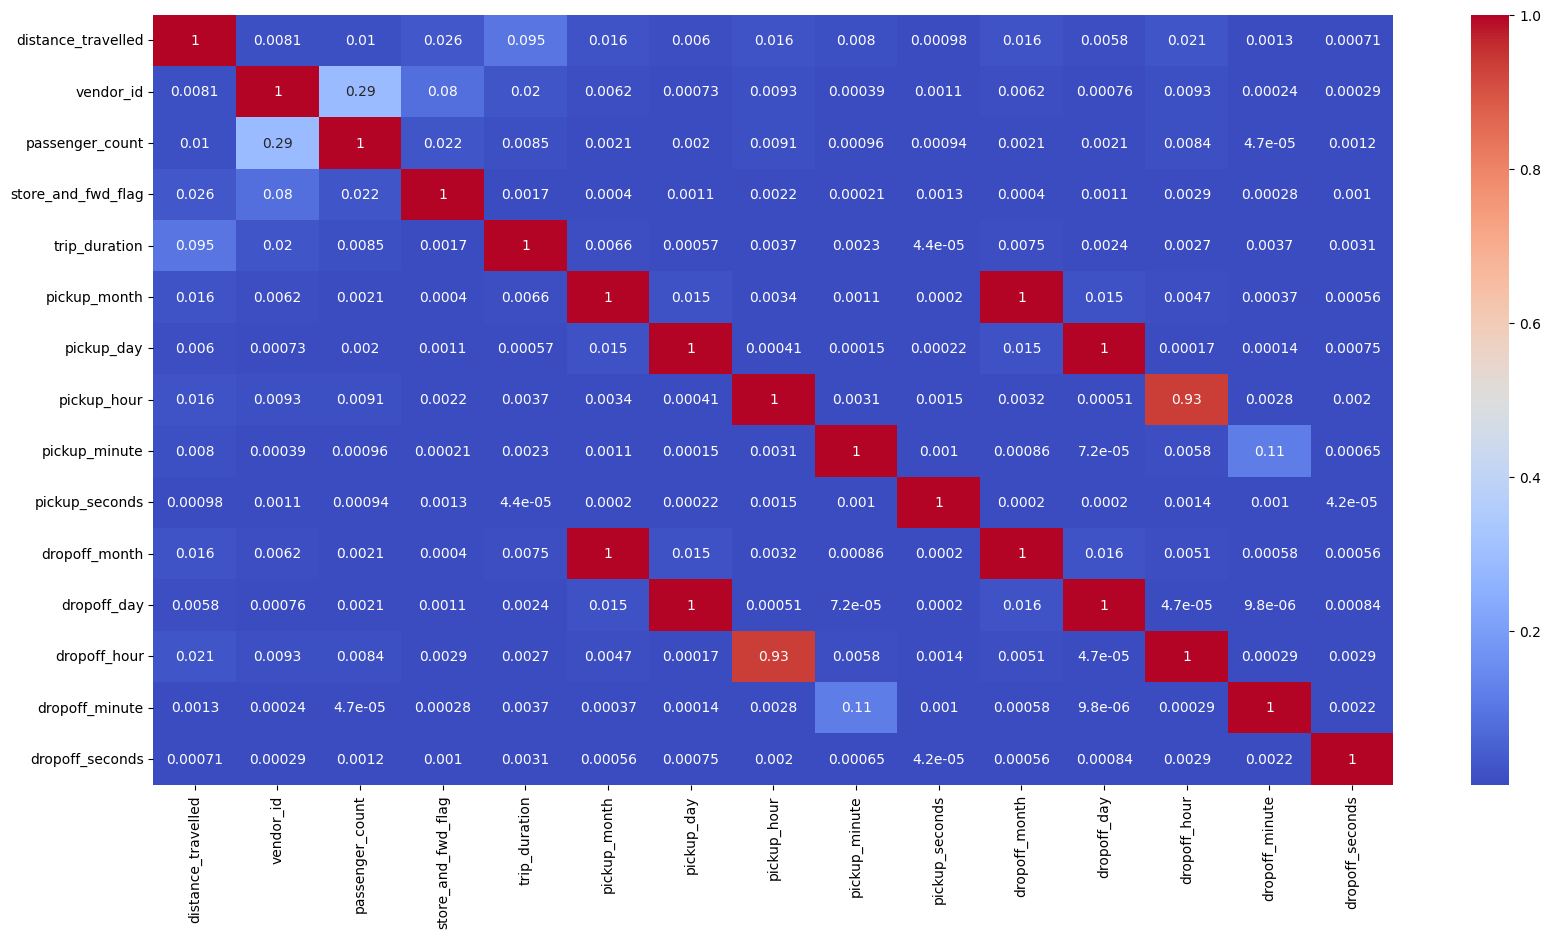

In [ ]:
plt.figure(figsize= ( 20 , 10))
correlation = third_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

#### 2. Feature Selection

**Now lets dive in to the realm of dimenssions to understand the requirements of features which would help us to build our machine learning model for our customers.**

In [ ]:
# Variance Inflation factor is very important t calculate to understand the inflated values which would be contributed by the features and their coefficients. SO to calculate
# VIF I am defining following function.

from statsmodels.stats.outliers_influence import variance_inflation_factor

def Cal_Vif(df):
  VIF = pd.DataFrame()
  VIF['feature']= df.columns
  VIF['VIF'] = [variance_inflation_factor(df.values , i) for i in range(df.shape[1])]
  return VIF

In [ ]:
Cal_Vif(third_df[[i for i in columns]])

,feature,VIF
0,distance_travelled,1.631140e+00
1,vendor_id,8.812535e+00
2,passenger_count,2.827710e+00
3,store_and_fwd_flag,1.010315e+00
4,trip_duration,2.615156e+01
5,pickup_month,8.946154e+07
6,pickup_day,2.025538e+06
7,pickup_hour,2.559613e+03
8,pickup_minute,7.332061e+00
9,pickup_seconds,3.573047e+00


**The above code is calculating the variance influence factor for all the independent features.**

In [ ]:
# Select your features wisely to avoid overfitting
independent_variable=[i for i in third_df.columns if i not in ['store_and_fwd_flag','pickup_month_name', 'dropoff_month_name','pickup_day_name', 
                                                               'trip_duration','id', 'pickup_datetime','dropoff_datetime']]
                                                            
dependent_variable= 'trip_duration'

Independent variable with all the important columns will be our selected features. Dependent variable as trip duration is our target variable.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
fifth_df=fourth_df.copy()

In [ ]:
# Transform Your data
symmetric_col=[]
skew_symmetric=[]
for i in fifth_df.columns:
  if abs(fifth_df[i].mean() - fifth_df[i].median()) > 0.1:
    skew_symmetric.append(i)
  else:
    symmetric_col.append(i)

print(f'Syemmetric columns are {symmetric_col} ')
print(f'skew_symmetric columns are {skew_symmetric} ')

Syemmetric columns are ['store_and_fwd_flag'] 
skew_symmetric columns are ['distance_travelled', 'vendor_id', 'passenger_count', 'trip_duration', 'pickup_month', 'pickup_day', 'pickup_hour', 'pickup_minute', 'pickup_seconds', 'dropoff_month', 'dropoff_day', 'dropoff_hour', 'dropoff_minute', 'dropoff_seconds'] 


**From the results we can see the higly skewed ness of the dataset**

skew_symmetric  columns have been stored in the skew_symmetric variable

In [ ]:
# putting the transformed values in our desired dataframe.

'''The transformation will occur only for those features which shows the skew symmetric distribution.'''

for i in skew_symmetric:
  fifth_df[i]=(fifth_df[i])**0.25 ## This is the exponenetial transformation for treating the skewedness.

Exponential transformation is helping us to create more balanced dataset.

In [ ]:
fifth_df.isnull().sum()

distance_travelled    0
vendor_id             0
passenger_count       0
store_and_fwd_flag    0
trip_duration         0
pickup_month          0
pickup_day            0
pickup_hour           0
pickup_minute         0
pickup_seconds        0
dropoff_month         0
dropoff_day           0
dropoff_hour          0
dropoff_minute        0
dropoff_seconds       0
dtype: int64

In [ ]:
symmetric_col1=[]
skew_symmetric1=[]
for i in columns:
  if abs(fifth_df[i].mean() - fifth_df[i].median()) > 0.1:
    skew_symmetric1.append(i)
  else:
    symmetric_col1.append(i)

print(f'Syemmetric columns are {symmetric_col1} ')
print(f'skew_symmetric columns are {skew_symmetric1} ')

Syemmetric columns are ['distance_travelled', 'vendor_id', 'passenger_count', 'store_and_fwd_flag', 'trip_duration', 'pickup_month', 'pickup_day', 'dropoff_month', 'dropoff_day'] 
skew_symmetric columns are ['pickup_hour', 'pickup_minute', 'pickup_seconds', 'dropoff_hour', 'dropoff_minute', 'dropoff_seconds'] 


**We can see the improvements in the list of skew symmetric. certain columns have moved from skew symmetric to symmetric after exponential transformation.**

### 6.Data Splitting

**So my ML models will be trained and tested on two datastes.**\
**First will be normal and natural Dataset.**\
**The Second one will be treated with outliers and transformed exponentially.**\
**The Outliers are treated and replaced with median values of individual feature.**
 

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
'''This is normal dataset.'''
X=third_df[independent_variable].values
y=third_df[dependent_variable].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split( X ,y ,test_size=0.3,random_state=0)
print(X_train.shape,X_test.shape)
print(Y_train.shape , Y_test.shape)

(1021050, 13) (437594, 13)
(1021050,) (437594,)


In [ ]:
'''This Dataset is treated with outliers and exponentially transformed.
So I am evaluating the accuracy and correctness of this dataset differently to see the differences.'''

X_tran=fifth_df[independent_variable].values
y_tran=fifth_df[dependent_variable].values

In [ ]:
X_train_tran,X_test_tran,Y_train_tran,Y_test_tran = train_test_split( X_tran ,y_tran ,test_size=0.3,random_state=0)
print(X_train_tran.shape,X_test_tran.shape)
print(Y_train_tran.shape , Y_test_tran.shape)

(1021050, 13) (437594, 13)
(1021050,) (437594,)


**The independent and dependent variable have been splitted in 70:30 ratio.**
**But For first Normal Dataset I have seen some anamoly in results after calculating the accuracy for the first model.On First Model,the Linear accuracy for normal Dataset is quite high but later on when I started moving towards further models , regularizations and cross validation I observed the accuracy for the models became worst. Hence I again processed the data to comapre the optimumness of the models with the normal one which showed 97% accuracy for the first model.**
> **Hence I used two independet and two dependent variable and scaled them differently.**

### 6. Data Scaling

### **Please be cautious with the names and notation for two different dataframes.**

In [ ]:
# Scaling your data
scaler=MinMaxScaler()
X_train1=scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

In [ ]:
'''Scaling for transformed dataset.'''

X_train_tran1=scaler.fit_transform(X_train_tran)
X_test_tran1 = scaler.transform(X_test_tran)

**I used MinMaxSCaler to scale the values all accordingly.**

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation for Nomal Dataset.
regressor= LinearRegression()
regressor.fit(X_train1,Y_train)


# ML Model - 1 Implementation for transformed Dataset.
regressor_tran= LinearRegression()
regressor_tran.fit(X_train_tran1,Y_train_tran)

LinearRegression()

**Following metric evaluation shows r2_score for Transformed Dataset.**

In [173]:
train_accuracy = regressor_tran.score(X_train_tran1,Y_train_tran)
test_accuracy = r2_score(Y_test_tran,regressor_tran.predict(X_test_tran1))

print('Train accuracy for the given Linear_regression Model for transformed Dataframe is ',train_accuracy)
print('Test accuracy for the given Linear_regression  Model for transformed Dataframe  is ',test_accuracy)

Train accuracy for the given Linear_regression Model for transformed Dataframe is  0.42322848391743084
Test accuracy for the given Linear_regression  Model for transformed Dataframe  is  0.420977335807854


**Following metric evaluation shows r2_score for Noraml Dataset.**

In [174]:
train_accuracy = regressor.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,regressor.predict(X_test1))

print('Train accuracy for the given Linear_regression Model for Normal Dataframe is ',train_accuracy)
print('Test accuracy for the given Linear_regression Model for Normal Dataframe is ',test_accuracy)

Train accuracy for the given Linear_regression Model for Normal Dataframe is  0.9498545857428005
Test accuracy for the given Linear_regression Model for Normal Dataframe is  0.9752571078148331


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Text(0.5, 1.0, 'Linear Regression on Transformed Dataframe')

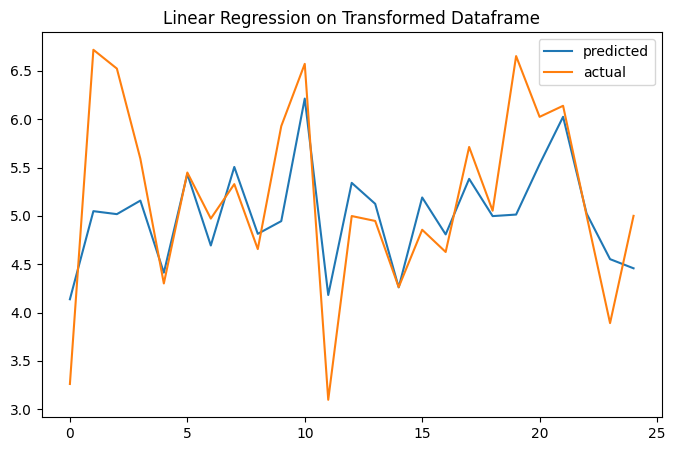

In [186]:
# Visualizing evaluation Metric Score chart
y_pred= regressor_tran.predict(X_test_tran1)
plt.figure(figsize=(8,5))
plt.plot(y_pred[:25], label='predicted')
plt.plot(Y_test_tran[:25], label='actual')
plt.legend(loc='best')
plt.title('Linear Regression on Transformed Dataframe')

**From he graph itself, we can see the poor accuracy for the transformed dataset**

Text(0.5, 1.0, 'Linear Regression on Normal Dataset')

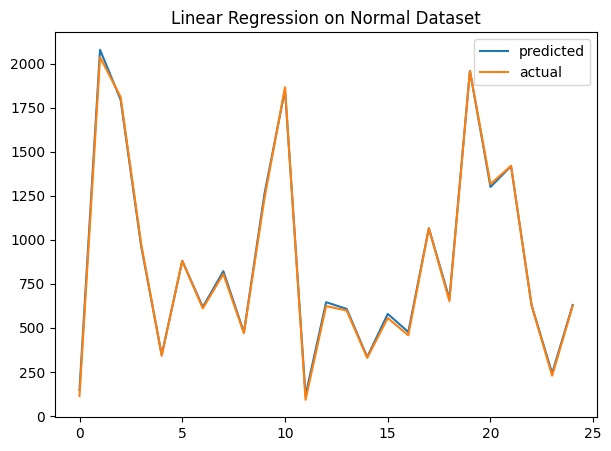

In [176]:
# Visualizing evaluation Metric Score chart
y_pred= regressor.predict(X_test1)
plt.figure(figsize=(7,5))
plt.plot(y_pred[:25], label='predicted')
plt.plot(Y_test[:25], label='actual')
plt.legend(loc='best')
plt.title('Linear Regression on Normal Dataset')

**So by plotting I want to make a point here. Despite being the untransformed dataframe it shows very high accuracy. But when move towards more advanced algorithms its accuracy should increase perse. This was my basic assumption.But the results of this DF is very poor as I move towards advanced algo.**

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
# Fit the Algorithm

'''Hyperparameter tuning for Lasso regression'''

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3 )
lasso_regressor.fit(X_train1, Y_train)
# Predict on the model
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -22674184.46571364


**Following metric evaluation shows r2_score for Transformed Dataset.**

In [ ]:
lasso_best_tran=Lasso(alpha=0.01)
lasso_best_tran.fit(X_train_tran1,Y_train_tran)

Lasso(alpha=0.01)

In [ ]:
train_accuracy = lasso_best_tran.score(X_train_tran1,Y_train_tran)
test_accuracy = r2_score(Y_test_tran,lasso_best_tran.predict(X_test_tran1))

print('Train accuracy for the given Lasso_regression for Transformed Dataset is ',train_accuracy)
print('Test accuracy for the given Lasso_regression for Transformed Dataset is ',test_accuracy)

Train accuracy for the given Lasso_regression for Transformed Dataset is  0.4105445791252096
Test accuracy for the given Lasso_regression for Transformed Dataset is  0.40844432608108405


**Following metric evaluation shows r2_score for Noraml Dataset.**

In [ ]:
lasso_best=Lasso(alpha=0.1)
lasso_best.fit(X_train1, Y_train)

Lasso(alpha=0.1)

In [ ]:
train_accuracy = lasso_best.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,lasso_best.predict(X_test1))
print('Train accuracy for the given Lasso_regression for Normal Dataset is ',train_accuracy)
print('Test accuracy for the given Lasso_regression for Normal Dataset is ',test_accuracy)

Train accuracy for the given Lasso_regression for Normal Dataset is  0.01395829297762008
Test accuracy for the given Lasso_regression for Normal Dataset is  0.009207379264105087


#### **Ridge Regularization**

**Following metric evaluation shows r2_score for Transformed Dataset.**

In [ ]:
ridge_tran=Ridge(alpha= 0.1)
ridge_tran.fit(X_train_tran1,Y_train_tran)

Ridge(alpha=0.1)

In [ ]:
train_accuracy = ridge_tran.score(X_train_tran1,Y_train_tran)
test_accuracy = r2_score(Y_test_tran,ridge_tran.predict(X_test_tran1))

print('Train accuracy for the given Ridge Regularization model on Transformed Dataset is ',train_accuracy)
print('Test accuracy for the given Ridge Regularization model on Transformed Dataset is ',test_accuracy)

Train accuracy for the given Ridge Regularization model on Transformed Dataset is  0.4232273037177997
Test accuracy for the given Ridge Regularization model on Transformed Dataset is  0.4209741049555977


**Following metric evaluation shows r2_score for Noraml Dataset.**

In [ ]:
ridge_best = Ridge(alpha= 0.001)
ridge_best.fit(X_train1,Y_train)

Ridge(alpha=0.001)

In [ ]:
train_accuracy = ridge_best.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,ridge_best.predict(X_test1))
print('Train accuracy for the given Ridge_regression model on Normal Dataset is ',train_accuracy)
print('Test accuracy for the given Ridge_regression model on Normal Dataset is ',test_accuracy)

Train accuracy for the given Ridge_regression model on Normal Dataset is  0.9495786370455905
Test accuracy for the given Ridge_regression model on Normal Dataset is  0.9746544359871601


**I have used GridSearch cross validation. The NYC taxi trip dataset is very large Dataset and it requires a strong tuning to arrive at a conclusion. A strong tuning implies a detailed and correct hyper parameters so that our customers can know there trip duration before booking their rides. Hence choosing Grid Search is just moving one step towards accuracy.**

**At first when the model is not tuned with hyperparameters , its accuracy was quite high upto 97%. But when I used Lasso regularization , its accuracy just slashed and mixed into the ashes.**\
**Whereas the Ridge Regularization was still there to save our business.**
> **For transformed Dataset it shows very less accuracy of 42% but for normal Dataset it was still high and shows 97% of accuracy.**
> **Now Our taxies are bifurcated on these two datasets. By normal tendency the normal dataset should have maintained its accuracy which it has not saved in Lasso regularization but the transformed was consistent in its journey and still onboarded on the taxi of improvement.**

### ML Model - 2

**Following metric evaluation shows r2_score for Transformed Dataset.**

In [ ]:
DTR_trans=DecisionTreeRegressor()
DTR_trans.fit(X_train_tran1,Y_train_tran)

DecisionTreeRegressor()

In [177]:
train_accuracy = DTR_trans.score(X_train_tran1,Y_train_tran)
test_accuracy = r2_score(Y_test_tran,DTR_trans.predict(X_test_tran1))

print('Train accuracy for the given Decision Tree Regressor Model for transformed Dataframe is ',train_accuracy)
print('Test accuracy for the given Decision Tree Regressor Model for transformed Dataframe is ',test_accuracy)

Train accuracy for the given Decision Tree Regressor Model for transformed Dataframe is  1.0
Test accuracy for the given Decision Tree Regressor Model for transformed Dataframe is  0.7660580866758913


**Following metric evaluation shows r2_score for Noraml Dataset.**

In [ ]:
DTR_norm=DecisionTreeRegressor()
DTR_norm.fit(X_train1,Y_train)

DecisionTreeRegressor()

In [178]:
train_accuracy = DTR_norm.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,DTR_norm.predict(X_test1))
print('Train accuracy for the given  Decision Tree Regressor Model for Normal Dataframe is ',train_accuracy)
print('Test accuracy for the given  Decision Tree Regressor Model for Normal Dataframe is ',test_accuracy)

Train accuracy for the given  Decision Tree Regressor Model for Normal Dataframe is  1.0
Test accuracy for the given  Decision Tree Regressor Model for Normal Dataframe is  -0.10784576574561466


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Text(0.5, 1.0, 'Decision Tree Regressor Model for transformed dataset')

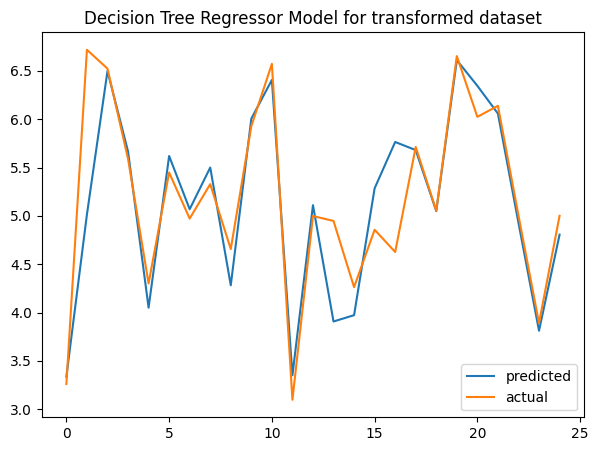

In [195]:
# Visualizing evaluation Metric Score chart
y_pred= DTR_trans.predict(X_test_tran1)
plt.figure(figsize=(7,5))
plt.plot(y_pred[:25], label='predicted')
plt.plot(Y_test_tran[:25], label='actual')
plt.legend(loc='best')

plt.title('Decision Tree Regressor Model for transformed dataset')



```
We can see a moderate accuracy. Our Taxies can be performed on this model with this sufficient accuracy
```



Text(0.5, 1.0, 'Decision Tree Regressor Model for Normal dataset')

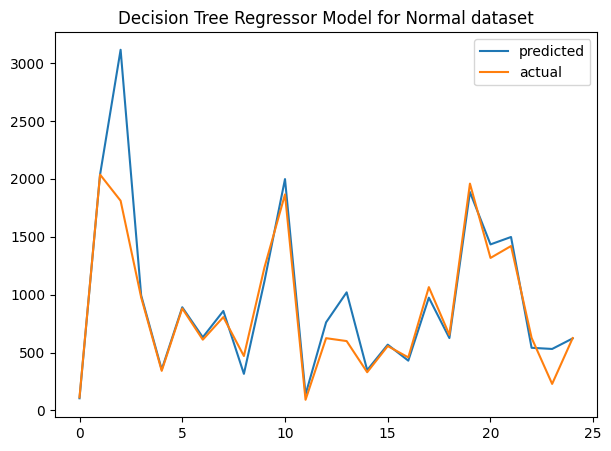

In [196]:
# Visualizing evaluation Metric Score chart
y_pred= DTR_norm.predict(X_test1)
plt.figure(figsize=(7,5))
plt.plot(y_pred[:25], label='predicted')
plt.plot(Y_test[:25], label='actual')
plt.legend(loc='best')
plt.title('Decision Tree Regressor Model for Normal dataset')

#### 2. Cross- Validation & Hyperparameter Tuning

**Cross Validation And Hyper Parameter tuning for the normal dataset.**

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
DTR_CV= DecisionTreeRegressor()
# Fit the Algorithm
param_grid = {
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

## Comment in order to publish in kaggle.

grid_cv_DTR = GridSearchCV(DTR_CV, param_grid, cv=3,verbose = 3)

grid_cv_DTR.fit(X_train1,Y_train)
# Predict on the model

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV 1/3] END max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10;, score=0.008 total time=   1.8s
[CV 2/3] END max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10;, score=0.025 total time=   1.7s
[CV 3/3] END max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10;, score=0.012 total time=   1.8s
[CV 1/3] END max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=20;, score=0.008 total time=   1.8s
[CV 2/3] END max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=20;, score=0.025 total time=   1.8s
[CV 3/3] END max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=20;, score=0.012 total time=   1.4s
[CV 1/3] END max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=40;, score=0.008 total time=   1.2s
[CV 2/3] END max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=40;, score=0.025 total

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 6, 8], 'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]},
             verbose=3)

In [ ]:
grid_cv_DTR.best_params_

{'max_depth': 6,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 40,
 'min_samples_split': 10}

**Model Implementation with the new best parameters.**

In [ ]:
# Model Implementation for Normal Dataset

DTR_no_best=DecisionTreeRegressor(max_depth=6,max_leaf_nodes=5,min_samples_leaf=40,min_samples_split=10)
DTR_no_best.fit(X_train1,Y_train)

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=5, min_samples_leaf=40,
                      min_samples_split=10)

In [199]:
'''Calculating the Various accuracies for Normal Dataset.'''


train_accuracy = DTR_no_best.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,DTR_no_best.predict(X_test1))
print('Train accuracy for the given Decision Tree regressor after cross validation on Normal dataframe is ',train_accuracy)
print('Test accuracy for the given Decision Tree regressor after cross validation on Normal dataframe is ',test_accuracy)

Train accuracy for the given Decision Tree regressor after cross validation on Normal dataframe is  0.01175407852411492
Test accuracy for the given Decision Tree regressor after cross validation on Normal dataframe is  0.007692198357775237


**Cross Validation and Hyper parameter tuning for the Transformed Dataset**

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
DTR_CV_tr= DecisionTreeRegressor()
# Fit the Algorithm
param_grid = {
              "min_samples_split": [10, 20, 40],
              "max_depth": [50,100,150],
              "min_samples_leaf": [100,150,200],
              "max_leaf_nodes": [5, 20, 100],
              "max_leaf_nodes":[200,400,600]
              }

## Comment in order to publish in kaggle.

grid_cv_DTR_tr = GridSearchCV(DTR_CV_tr, param_grid, cv=3,verbose = 3)

grid_cv_DTR_tr.fit(X_train_tran1,Y_train_tran)
# Predict on the model

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV 1/3] END max_depth=50, max_leaf_nodes=200, min_samples_leaf=100, min_samples_split=10;, score=0.593 total time=   5.0s
[CV 2/3] END max_depth=50, max_leaf_nodes=200, min_samples_leaf=100, min_samples_split=10;, score=0.595 total time=   4.6s
[CV 3/3] END max_depth=50, max_leaf_nodes=200, min_samples_leaf=100, min_samples_split=10;, score=0.595 total time=   6.0s
[CV 1/3] END max_depth=50, max_leaf_nodes=200, min_samples_leaf=100, min_samples_split=20;, score=0.593 total time=   6.8s
[CV 2/3] END max_depth=50, max_leaf_nodes=200, min_samples_leaf=100, min_samples_split=20;, score=0.595 total time=   5.7s
[CV 3/3] END max_depth=50, max_leaf_nodes=200, min_samples_leaf=100, min_samples_split=20;, score=0.595 total time=   4.7s
[CV 1/3] END max_depth=50, max_leaf_nodes=200, min_samples_leaf=100, min_samples_split=40;, score=0.593 total time=   5.1s
[CV 2/3] END max_depth=50, max_leaf_nodes=200, min_samples_leaf=100, min_samp

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [50, 100, 150],
                         'max_leaf_nodes': [200, 400, 600],
                         'min_samples_leaf': [100, 150, 200],
                         'min_samples_split': [10, 20, 40]},
             verbose=3)

In [ ]:
'''These are the best Parameters we have found out via our Cross validation and hyper parameter tuning'''
grid_cv_DTR_tr.best_params_

{'max_depth': 100,
 'max_leaf_nodes': 600,
 'min_samples_leaf': 100,
 'min_samples_split': 10}

In [ ]:
# Model Implementation for Transformed Dataset

DTR_tran_best= DecisionTreeRegressor(max_depth=150,max_leaf_nodes=700,min_samples_leaf=100,min_samples_split=20)
DTR_tran_best.fit(X_train_tran1,Y_train_tran)

DecisionTreeRegressor(max_depth=150, max_leaf_nodes=700, min_samples_leaf=100,
                      min_samples_split=20)

In [200]:
'''Calculating the various accuracies for Transformed Datset'''


train_accuracy = DTR_tran_best.score(X_train_tran1,Y_train_tran)
test_accuracy = r2_score(Y_test_tran, DTR_tran_best.predict(X_test_tran1))
print( 'The train accuracy for the given Decision Tree Regressor model after cross validation for Transformed Dataset is ',train_accuracy)
print('The test accuracy for the given Decision Tree Regressor model after cross validation for Transformed Dataset is',test_accuracy)

The train accuracy for the given Decision Tree Regressor model after cross validation for Transformed Dataset is  0.6179217880832997
The test accuracy for the given Decision Tree Regressor model after cross validation for Transformed Dataset is 0.6120953577844302


**I have used Grid Search cross validation here for model optimization. It fits model 243 times to optimize the training for our taxi business. When it comes with its best parameters, it cultivates a very normal scores for both the types of Datasets.**

**The astonishing events have happened after the cross validation.In both the Datasets the acciracy have hampered, which was a little better at earlier events. So what now!!**\
**Now we would move towards more better and more advanced regressor to cultivate best results for our customers.**

**Still I would say If we use Decision tree regressor without tuning the model with our very specific transformed dataset, it would still work and would give 77% correct result.**

### ML Model - 3

**The Model Implementation for the transformed Dataset.**

In [ ]:
# ML Model - 3 Implementation
XGBR=XGBRegressor()
# Fit the Algorithm
XGBR.fit(X_train_tran1,Y_train_tran)
# Predict on the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
train_accuracy = XGBR.score(X_train_tran1,Y_train_tran)
test_accuracy = r2_score(Y_test_tran,XGBR.predict(X_test_tran1))
print('Train accuracy for the given model XGBRegressor is ',train_accuracy)
print('Test accuracy for the given model XGBRegressor is ',test_accuracy)

Train accuracy for the given model XGBRegressor is  0.9639757086155345
Test accuracy for the given model XGBRegressor is  0.9625964951229535


Text(0.5, 1.0, 'Extreme Gradient Boosting Regressor Model for Normal dataset')

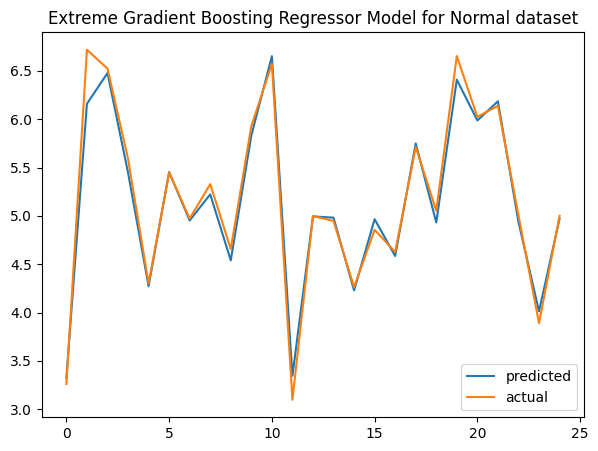

In [198]:
# Visualizing evaluation Metric Score chart
y_pred= XGBR.predict(X_test_tran1)
plt.figure(figsize=(7,5))
plt.plot(y_pred[:25], label='predicted')
plt.plot(Y_test_tran[:25], label='actual')
plt.legend(loc='best')
plt.title('Extreme Gradient Boosting Regressor Model for Normal dataset')

**So we can see our Taxies are experiencing more accuracy and correctness while predicting the trip duration for our customers.**

**The Model Implementation for normal dataset**

In [ ]:
# ML Model - 3 Implementation
XGBR_no=XGBRegressor()
# Fit the Algorithm
XGBR_no.fit(X_train1,Y_train)
# Predict on the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
train_accuracy = XGBR_no.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,XGBR_no.predict(X_test1))
print('Train accuracy for the given model XGBRegressor is ',train_accuracy)
print('Test accuracy for the given model XGBRegressor is ',test_accuracy)

Train accuracy for the given model XGBRegressor is  0.9044630651796648
Test accuracy for the given model XGBRegressor is  0.45983970259468576


Text(0.5, 1.0, 'Decision Tree Regressor Model for Normal dataset')

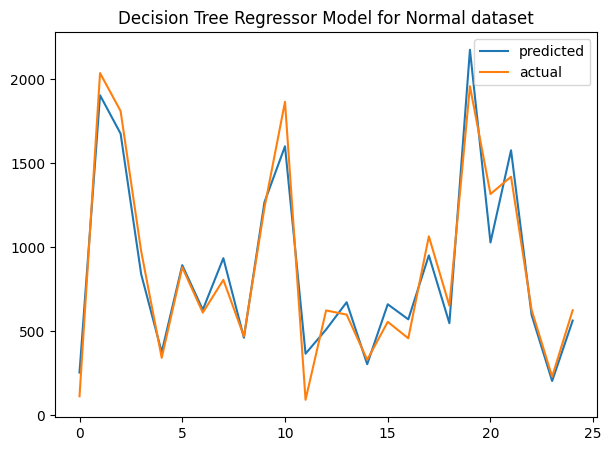

In [204]:
# Visualizing evaluation Metric Score chart
y_pred= XGBR_no.predict(X_test1)
plt.figure(figsize=(7,5))
plt.plot(y_pred[:25], label='predicted')
plt.plot(Y_test[:25], label='actual')
plt.legend(loc='best')
plt.title('Decision Tree Regressor Model for Normal dataset')

#### 2. Cross- Validation & Hyperparameter Tuning

**Cross Validation And Hyper Parameter tuning for the normal dataset.**

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
XGBR_CV =XGBRegressor()

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

grid_cv_XGBR = RandomizedSearchCV(XGBR_CV, param_distributions=params, 
                                   n_iter=5,
                                   n_jobs=4, cv=5, verbose=3, random_state=1001 )

grid_cv_XGBR.fit(X_train1,Y_train)
# Predict on the model

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, verbose=3)

In [ ]:
'''The best Parameters for the extreme gradient boosting regressor.'''

grid_cv_XGBR.best_params_

{'subsample': 0.8,
 'min_child_weight': 5,
 'max_depth': 5,
 'gamma': 1,
 'colsample_bytree': 0.8}

**Model Implementation with the new best parameters.**

In [ ]:
XGB_no_best=XGBRegressor(subsample=0.8,min_child_weight=5,max_depth=5,gamma=1,colsample_bytree=0.8)
XGB_no_best.fit(X_train1,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
train_accuracy = XGB_no_best.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,XGB_no_best.predict(X_test1))
print('Train accuracy for the given Ridge_regression is ',train_accuracy)
print('Test accuracy for the given Ridge_regression is ',test_accuracy)

Train accuracy for the given Ridge_regression is  0.7738225063936102
Test accuracy for the given Ridge_regression is  0.2492440358069392


**Cross Validation and Hyper parameter tuning for the Transformed Dataset**

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
XGBR_CV =XGBRegressor()

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

grid_cv_XGBR_tran = RandomizedSearchCV(XGBR_CV, param_distributions=params, 
                                   n_iter=5,
                                   n_jobs=4, cv=3, verbose=3, random_state=1001 )

grid_cv_XGBR_tran.fit(X_train_tran1,Y_train_tran)
# Predict on the model

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, verbose=3)

In [ ]:
'''These are the best Parameters we have found out via our Cross validation and hyper parameter tuning'''
grid_cv_XGBR_tran.best_params_

{'subsample': 0.6,
 'min_child_weight': 1,
 'max_depth': 5,
 'gamma': 1.5,
 'colsample_bytree': 0.8}

In [ ]:
XGB_tran_best= XGBRegressor(max_depth=5,max_leaf_nodes=700,min_samples_leaf=100,min_samples_split=20)
XGB_tran_best.fit(X_train_tran1,Y_train_tran)

[05:14:58] WARNING: ../src/learner.cc:767: 
Parameters: { "max_leaf_nodes", "min_samples_leaf", "min_samples_split" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaf_nodes=700,
             max_leaves=None, min_child_weight=None, min_samples_leaf=100,
             min_samples_split=20, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, ...)

In [ ]:
train_accuracy = XGB_tran_best.score(X_train_tran1,Y_train_tran)
test_accuracy = r2_score(Y_test_tran, XGB_tran_best.predict(X_test_tran1))
print( 'The train accuracy for the given Decision Tree Regressor model for Transformed Dataset is ',train_accuracy)
print('The test accuracy for the given Decision Tree Regressor model for Transformed Dataset is',test_accuracy)

The train accuracy for the given Decision Tree Regressor model for Transformed Dataset is  0.950471718345941
The test accuracy for the given Decision Tree Regressor model for Transformed Dataset is 0.949797916454139


I used some basic hyper parameters to tune our extreme gradient boost model

**If we talk about the improvements, I would say our NYC taxies were performing better when the model was untuned with its default settings.**\
**But it have helped to improve the accuracy for the Normal dataset.**\
**But if we talk about the applicability and reliance over the result for business growth , the untuned model was performing more better.**
**The reason is, it shows 97% of accuracy with train and test.**

### ML Model 4

**Following metric evaluation shows r2_score for Transformed Dataset.**

In [ ]:
GBR_tran=HistGradientBoostingRegressor()
GBR_tran.fit(X_train_tran1,Y_train_tran)

HistGradientBoostingRegressor()

In [ ]:
train_accuracy = GBR_tran.score(X_train_tran1,Y_train_tran)
test_accuracy = r2_score(Y_test_tran,GBR_tran.predict(X_test_tran1))
print('Train accuracy for the given DTR is ',train_accuracy)
print('Test accuracy for the given DTR is ',test_accuracy)

Train accuracy for the given DTR is  0.8588726317083087
Test accuracy for the given DTR is  0.8576170389470567


**Following metric evaluation shows r2_score for Noraml Dataset.**

In [ ]:
GBR=HistGradientBoostingRegressor()
GBR.fit(X_train1,Y_train)

HistGradientBoostingRegressor()

In [ ]:
train_accuracy = GBR.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,GBR.predict(X_test1))
print('Train accuracy for the given DTR is ',train_accuracy)
print('Test accuracy for the given DTR is ',test_accuracy)

Train accuracy for the given DTR is  0.5532262143087365
Test accuracy for the given DTR is  0.1824808281741198


**SO actually there was no point to implement hist gradient boosting regressor after implementing and acheiving the high accuracy. But I wanted to evaluate the accuracy score for our transformed Dataset on a  simle and fast algorithm to cross check the compatibility of the Datapoints.**

## Final Words on ML Model.

**For the Evalution of my models , I basically relies on the r2 score. I consider r2 score is reliable and accurate metric to be evaluated.**\
**R2 score is actually a relative study of any machine learning model's testing and training datapoints.**\
**It studies the relation between independent variable and dependent variable in two ways.**\
 **First it studies the sum of residual's squares and then it also calculate the sum of difference between each data point and mean of testing feature.**\
**Due its relative output, I considered r2_score is optimum and sufficient for our NYC taxi ML model.**

**So the most significant help have been arrived from extreme gradient boost where it has shown a concurrence between training accuracy and testing accuracy.**
**XGBR model shows 96% accuracy for training dataset and 97% accuracy for testing dataset.**\
**When ML models are train, overfitting is a very obvious case.** **But when model shows very high accuracy for both training and testing, we can say the model is best suited for the growth of business.**\
**Hence for the deployment NYC taxies should use the XGBM for the better user experience in there business.**

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Extreme Gradien Boosting Regressor have used the transformed data for training which consist near about 70% data of the given dataset. Then It have cultivated a very beautiful results even without the hyper parameter tuning. So we can say the NYC taxies and even other cab businesses can very easily use the given model to predict the trip duration of their journey.**

In [212]:
coef=pd.DataFrame((XGBR.feature_importances_),index=independent_variable).rename(columns={0:'Features'})

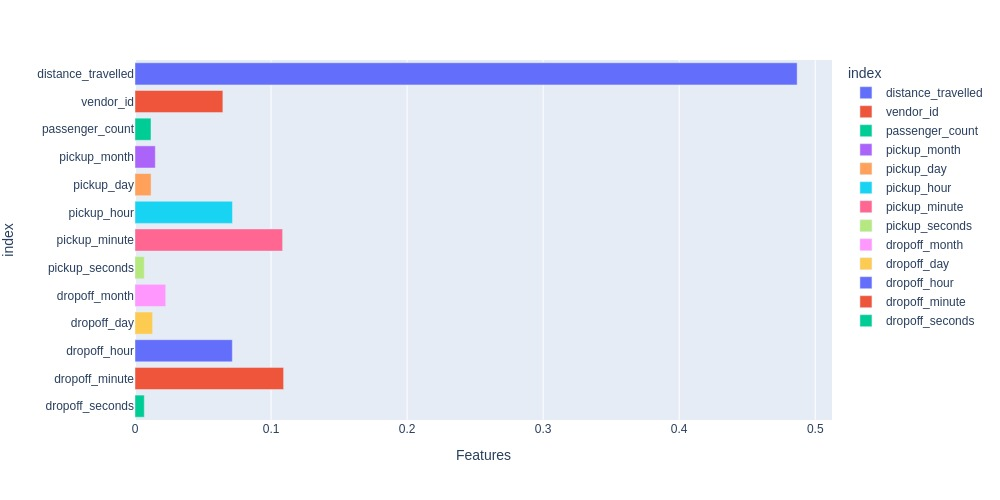

In [223]:
fig=px.bar(coef,x= coef['Features'],y=coef.index,color=coef.index)
fig.update_layout(width=1000,height=500)
fig.show('jpg')

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [224]:
# Save the File
XGBR=XGBRegressor()
# Fit the Algorithm
XGBR.fit(X_train_tran1,Y_train_tran)

train_accuracy=XGBR.score(X_train_tran1,Y_train_tran)
test_accuracy = r2_score(Y_test_tran,XGBR.predict(X_test_tran1))
print(train_accuracy)
print(test_accuracy)

0.9639757086155345
0.9625964951229535


In [225]:
import pickle

In [229]:
with open("XGBR_Regression.pkl", "wb") as f:
    pickle.dump(XGBR, f)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [230]:
# Load the File and predict unseen data.
with open("XGBR_Regression.pkl", "rb") as f:
    unpickled_linear_model = pickle.load(f)

In [232]:
unpickled_linear_model.score(X_test_tran1,Y_test_tran)

0.9625964951229535

# **Conclusion**

**The first basic conclusion is that, the DF which was treated with outliers and transformed exponentially has performed excellent on every model. Even though in the initial models it was half of its journey to the optimum accuracy but later on with more advanced algorithms it outperforms with some basic hyper parameters.**

**So when we deploy our XGBM to NYC taxi businesses we can expect a high level accuracy while predicting the most expected and most correct required trip duration.**

**So here XGBM shows 97% accuracy on training and testing datasets.**\
**The distance travelled by the taxies and the respective pickup and drop off time are the most important features with maximum contribution.**\
**On Decision tree regressor and random forest regressor the model was not optimally fitted and was lacking in the desired amount of accuracy.**